In [118]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import math as math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d
import random

#Graph Settings
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] =15
plt.rcParams["figure.figsize"] = fig_size

name=["SKMS", "SKP","SLY4","SV-MIN","UNEDF0","UNEDF1",]


# Getting Experimental Binding Energies

In [121]:
#importing from experimental file
# Num Nuc  A   N   Z        E        E/A     dE     Eval    S1n     dS1n  Eval    
# 0   1    2   3   4        5        6       7      8       9       10    11

#S1p     dS1p  Eval    S2n     dS2n  Eval    S2p     dS2p  Eval
#12      13    14      15      16    17      18      19    20


exp_energies = np.loadtxt('EXPERIMENT_AME2016-Copy1.dat',usecols=(3,4,5))
exp_energies=np.transpose(exp_energies)
exp_energies[2]=-exp_energies[2]
exp_energies=np.transpose(exp_energies)


exp_energies_d={}

for i in exp_energies:
    exp_energies_d[i[0],i[1]]=i

#EXP ENERGIES: N, Z, EXP E
#the_energies: N,Z,T_BE,Q,S_n,S_p

print(np.shape(exp_energies))
print("0: ", exp_energies[0])

(3433, 3)
0:  [1.       1.       2.224552]


# Theoretical

In [122]:
#theoretical importing relevent data
#Symbolm Z  N A Binding_Energy_(MeV)  S_p_(MeV)  S_{2p}_(MeV) S_n_(MeV)  S_{2n}_(MeV) Q_{alpha}_(MeV)       
#0      1  2 3 4                     5          6            7          8            9

the_energies= [[],[], [], [], [], [],]

the_names   =['SKMS_all_nuclei-new-Copy1.dat',
              'SKP_all_nuclei-Copy1.dat',
              'SLY4_all_nuclei-new-Copy1.dat',
              'SV-MIN_all_nuclei-new-Copy1.dat',
              'UNEDF0_all_nuclei-new-Copy1.dat',
              'UNEDF1_all_nuclei-new-Copy1.dat']

#the_energies: N,Z,T_BE,Q,S_n,S_p

the_energies[0] = np.genfromtxt('SKMS_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))   
the_energies[1] = np.genfromtxt('SKP_all_nuclei-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[2] = np.genfromtxt('SLY4_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[3] = np.genfromtxt('SV-MIN_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[4] = np.genfromtxt('UNEDF0_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[5] = np.genfromtxt('UNEDF1_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))

  
    



for i in range(0,6):   
    the_energies[i]=np.transpose(the_energies[i])
    the_energies[i][2]=-the_energies[i][2]
    the_energies[i]=np.transpose(the_energies[i])
    #print(len(the_energies[i]))

print(the_energies[0][0])
print(the_energies[1][0])
print(the_energies[2][0])


[ 2.       2.      30.01944      nan      nan      nan]
[ 2.        2.       29.983718       nan       nan       nan]
[ 2.        2.       30.710089       nan       nan       nan]


# Removing NaN values in the theoretical data set

In [123]:
 
the_nonan_energies                       =[[],[],[],[],[],[]]
for i in range(0,6):
    for the_energies_i in the_energies[i]:
        if math.isnan(the_energies_i[0]) or math.isnan(the_energies_i[2]) or math.isnan(the_energies_i[3]) or math.isnan(the_energies_i[4]) or math.isnan(the_energies_i[5]):
           x=1
        else:
            the_nonan_energies[i].append(the_energies_i)
            

the_energies=the_nonan_energies

print(the_energies[0][0])
print(the_energies[1][0])
print(the_energies[2][0])


[ 4.        4.       56.131949  2.187491 15.274275 13.806724]
[ 4.        4.       56.070979  2.212739 15.550024 14.131022]
[ 4.        4.       55.470044  3.540045 16.069022 14.659086]


# Creating Dictionaries

In [124]:

the_energies_d   =[{},{},{},{},{},{},]
for i in range(0,6):
    for the_energies_i in the_energies[i]:
        #print(np.shape(the_range_i))
        the_energies_d[i][the_energies_i[0],the_energies_i[1]]=the_energies_i
        #print(the_range_d[i][the_range_i[0],the_range_i[1]])
        
    

# Finding where the experimental and theoretical overlap

In [125]:
the_exp_mat_energies=[[],[],[],[],[],[]]
the_exp_mat_energies_d=[{},{},{},{},{},{}]


#EXP ENERGIES:          N,||Z,||      || E_BE,||            ||   ||     ||
#the_energies:          N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p
#the_exp_mat_energies:  N,||Z,|| T_BE,|| E_BE,|| difference,|| Q,|| S_n,|| S_p
#the_no_mat_energies:   N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p

for i in range(0,6):
    
    
    for exp_energies_i in exp_energies:  
        try:
            the_energies_d[i][exp_energies_i[0],exp_energies_i[1]]
            
            
            # Neutron, Proton, T_BE, E_BE, difference, Q, S_n, S_p
            
            #N
            a=exp_energies_i[0]
            #Z
            b=exp_energies_i[1]
            #T_BE
            c=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2]
            #E_BE
            d=exp_energies_i[2]
            #difference
            e=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2]-exp_energies_i[2]
            #Q
            f=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][3]
            #S_n
            g=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][4]
            #S_p
            h=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][5]
            
            
            arr=np.array((a,b,c,d,e,f,g,h))
            the_exp_mat_energies[i].append(arr)
            the_exp_mat_energies_d[i][exp_energies_i[0],exp_energies_i[1]]=arr
            

        except KeyError:
            continue
        

the_no_mat_energies  =[[],[],[],[],[],[]]
the_no_mat_energies_d=[{},{},{},{},{},{}]

for i in range(0,6):
    for the_energies_i in the_energies[i]:
        try:
            exp_energies_d[the_energies_i[0],the_energies_i[1]]
            
        except KeyError:
            the_no_mat_energies[i].append(the_energies_i)
            the_no_mat_energies_d[i][the_energies_i[0],the_energies_i[1]]=the_energies_i
            
            continue


 

# Finding the reference nuclei

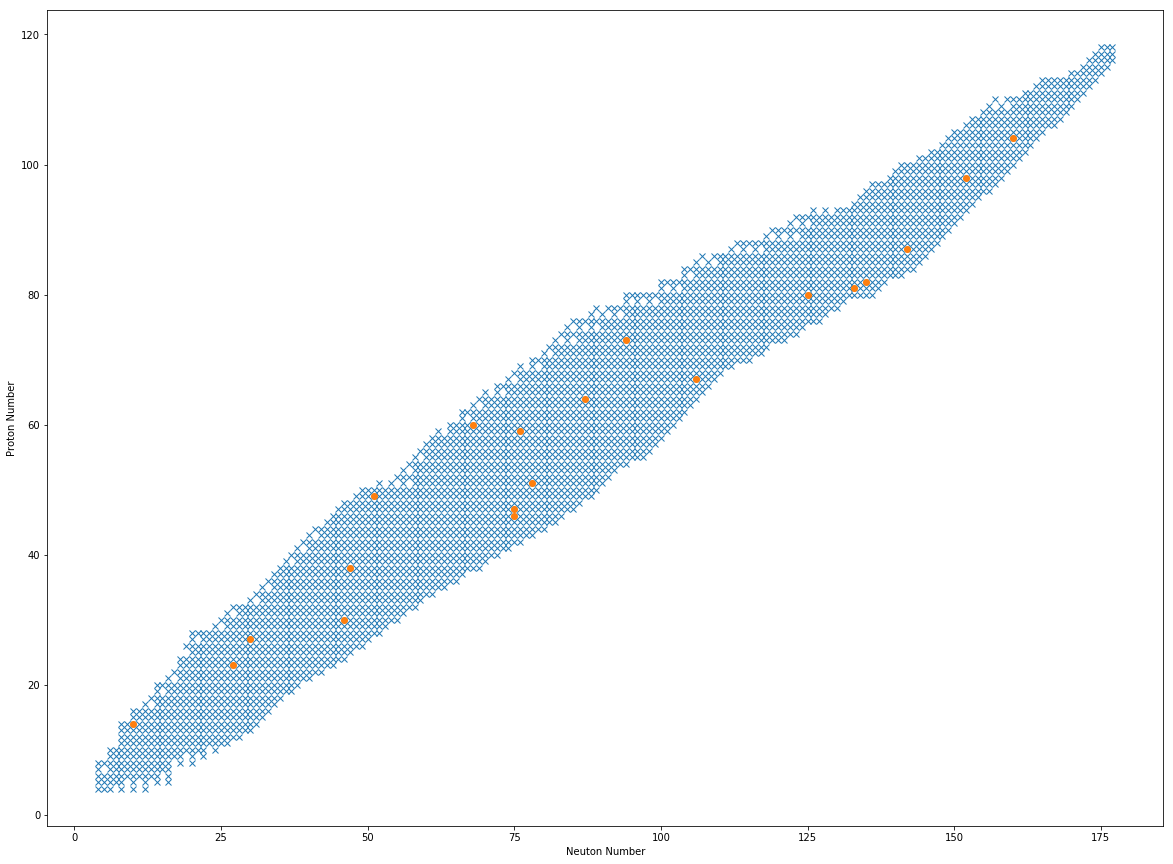

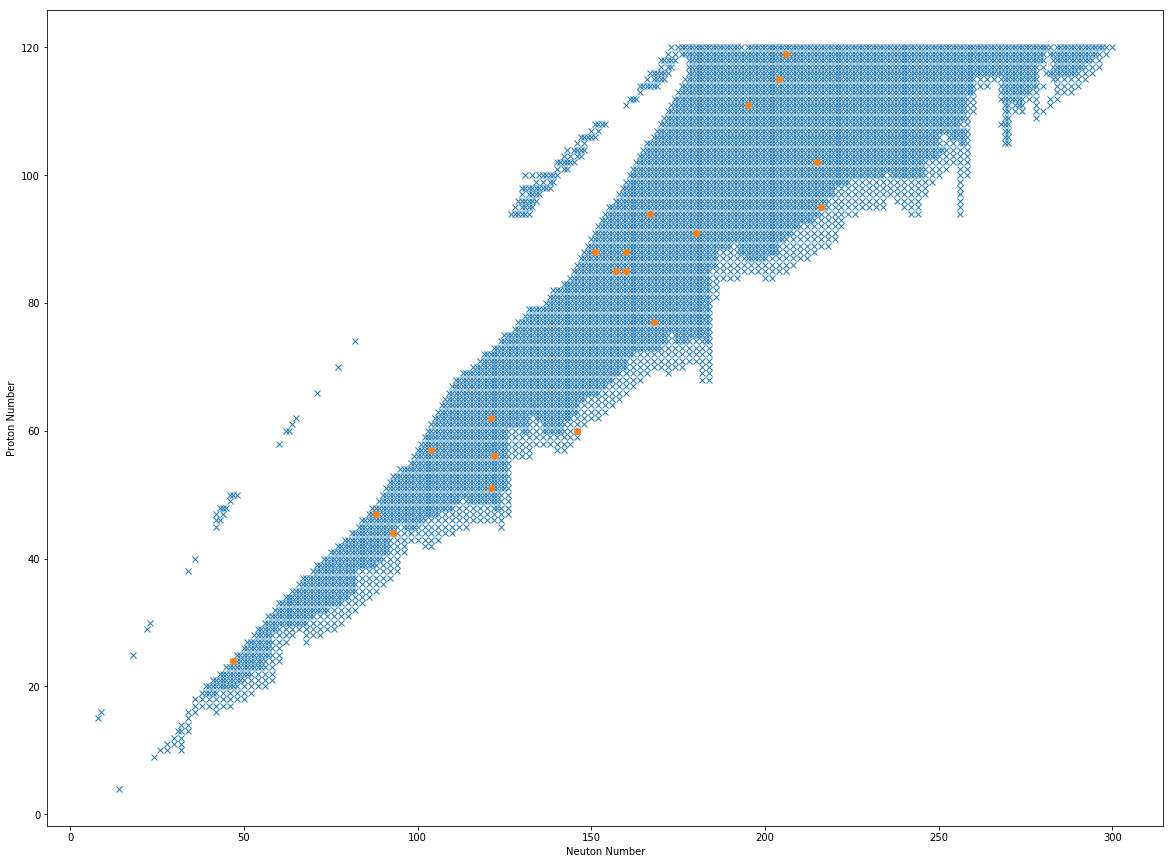

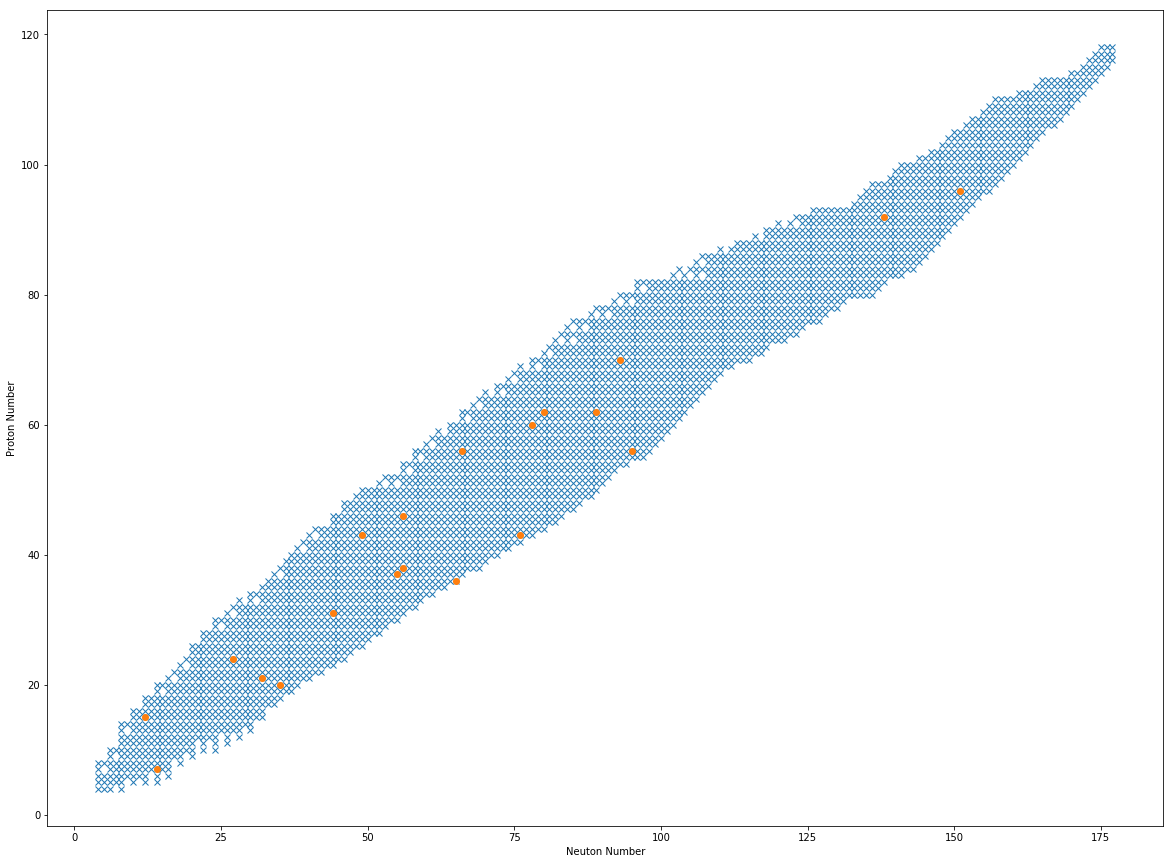

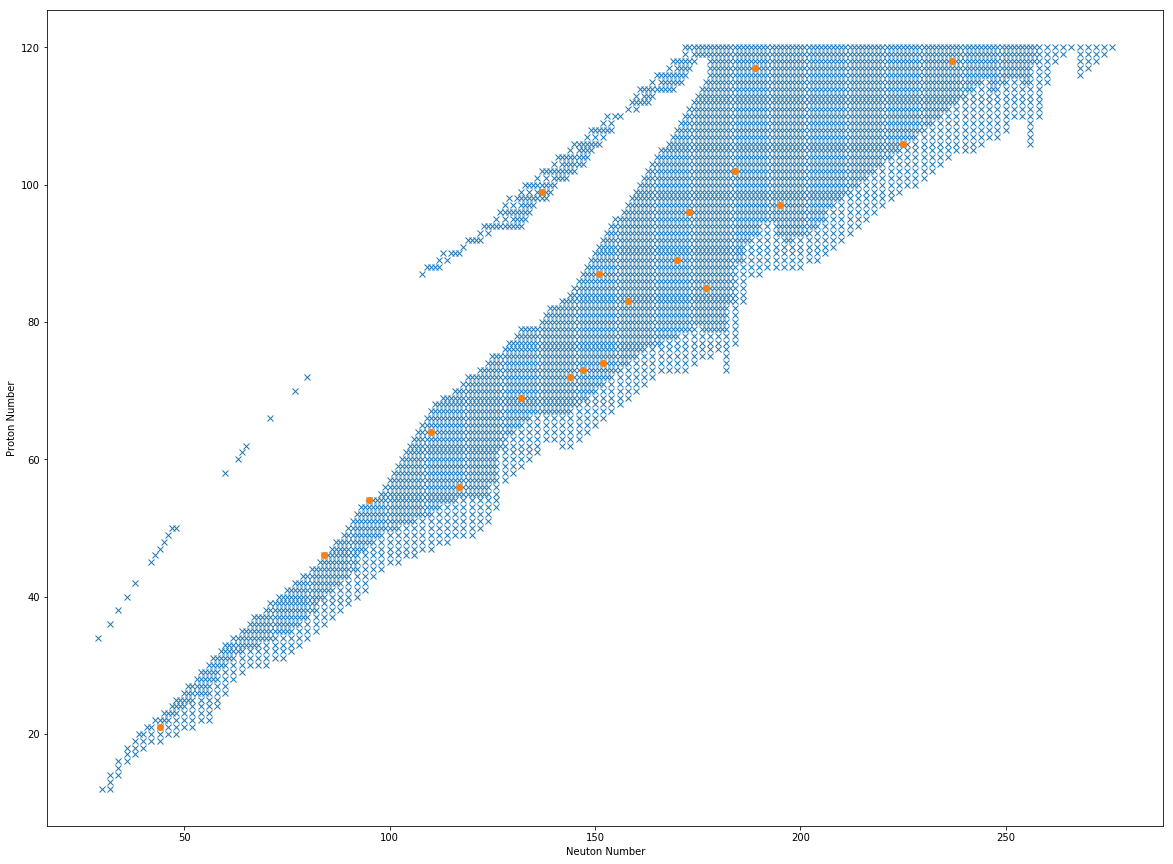

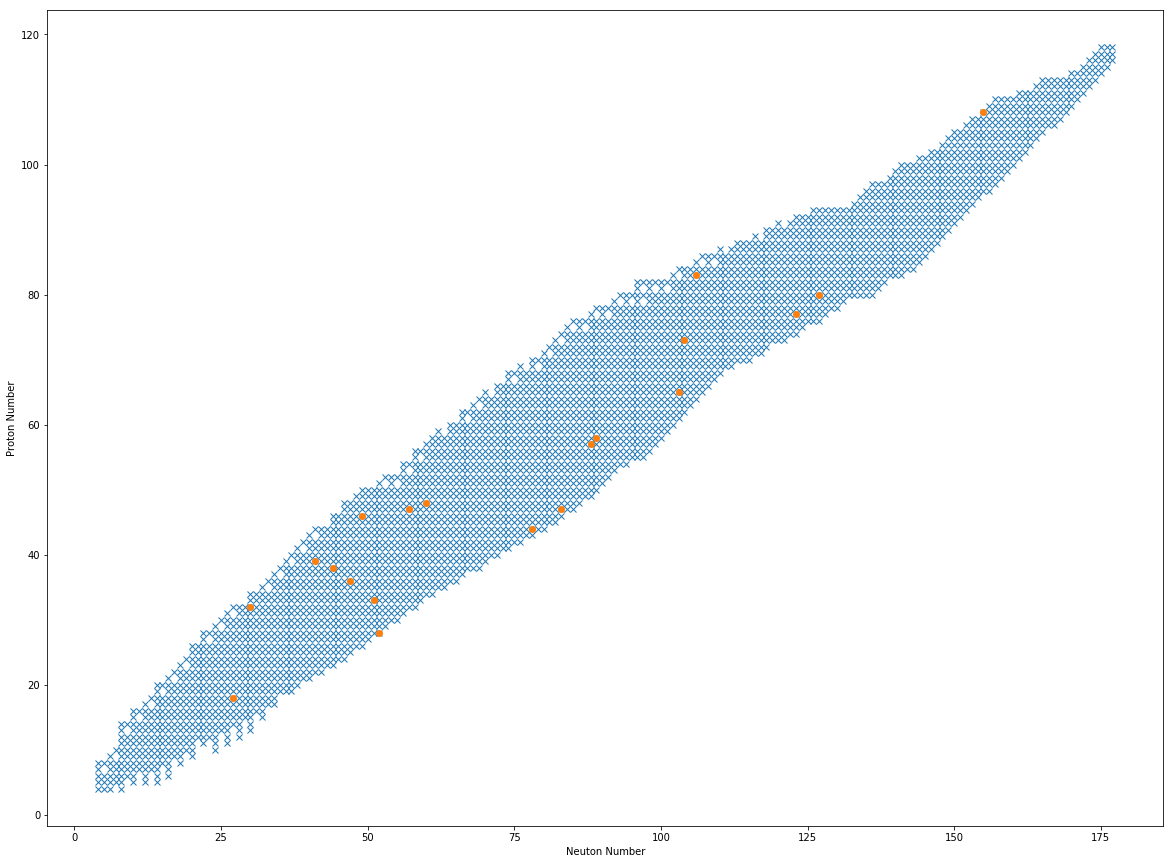

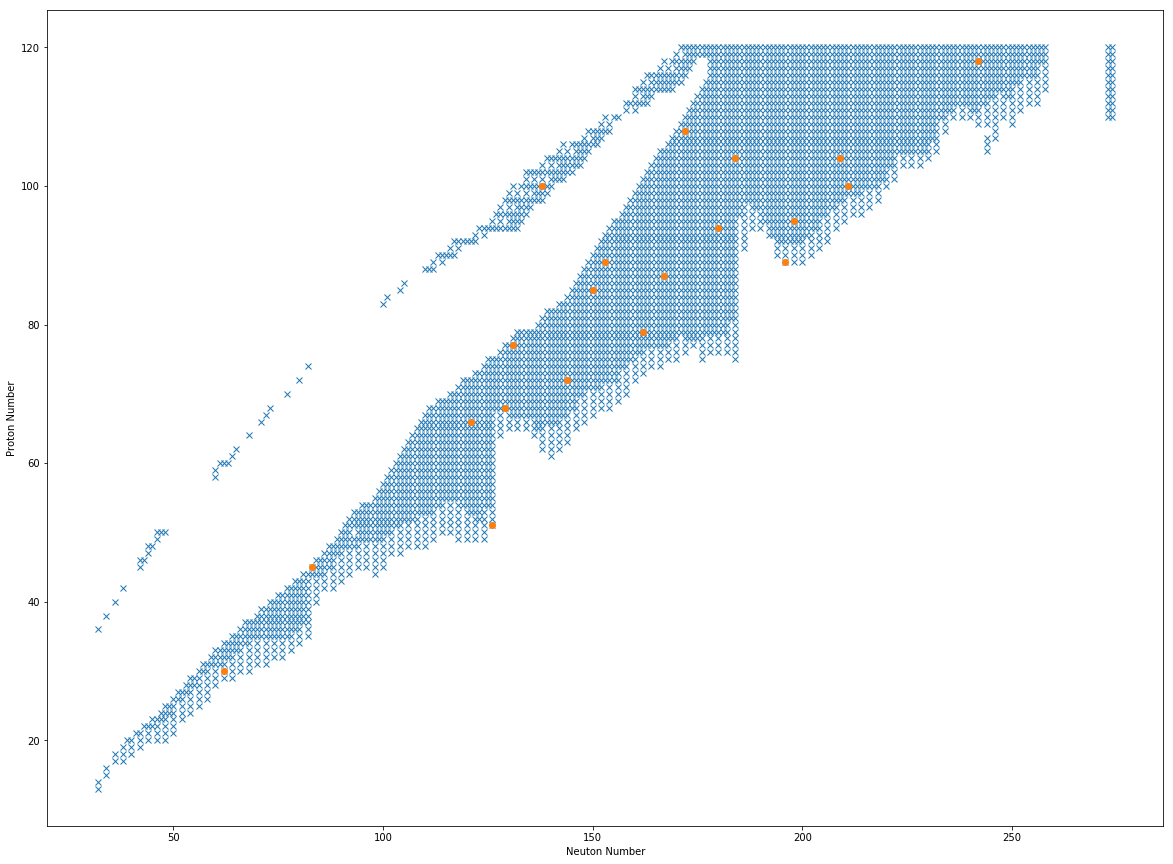

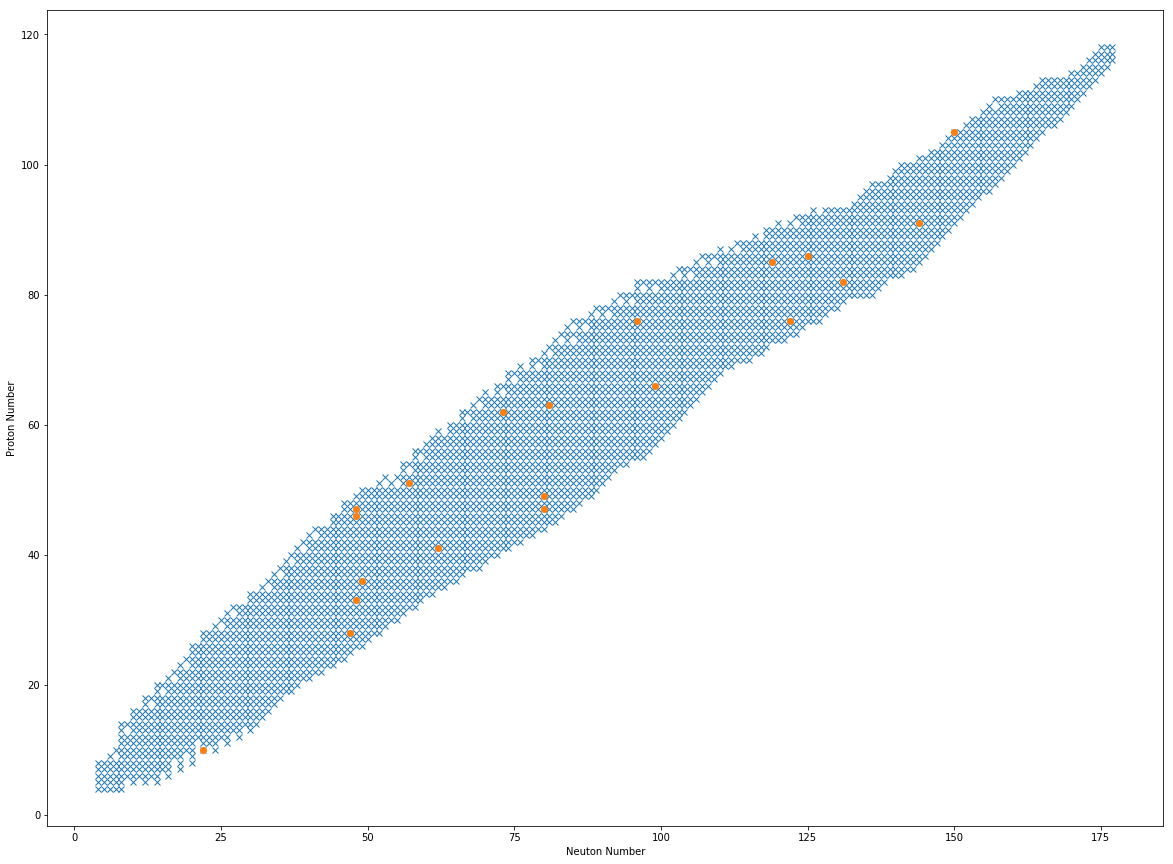

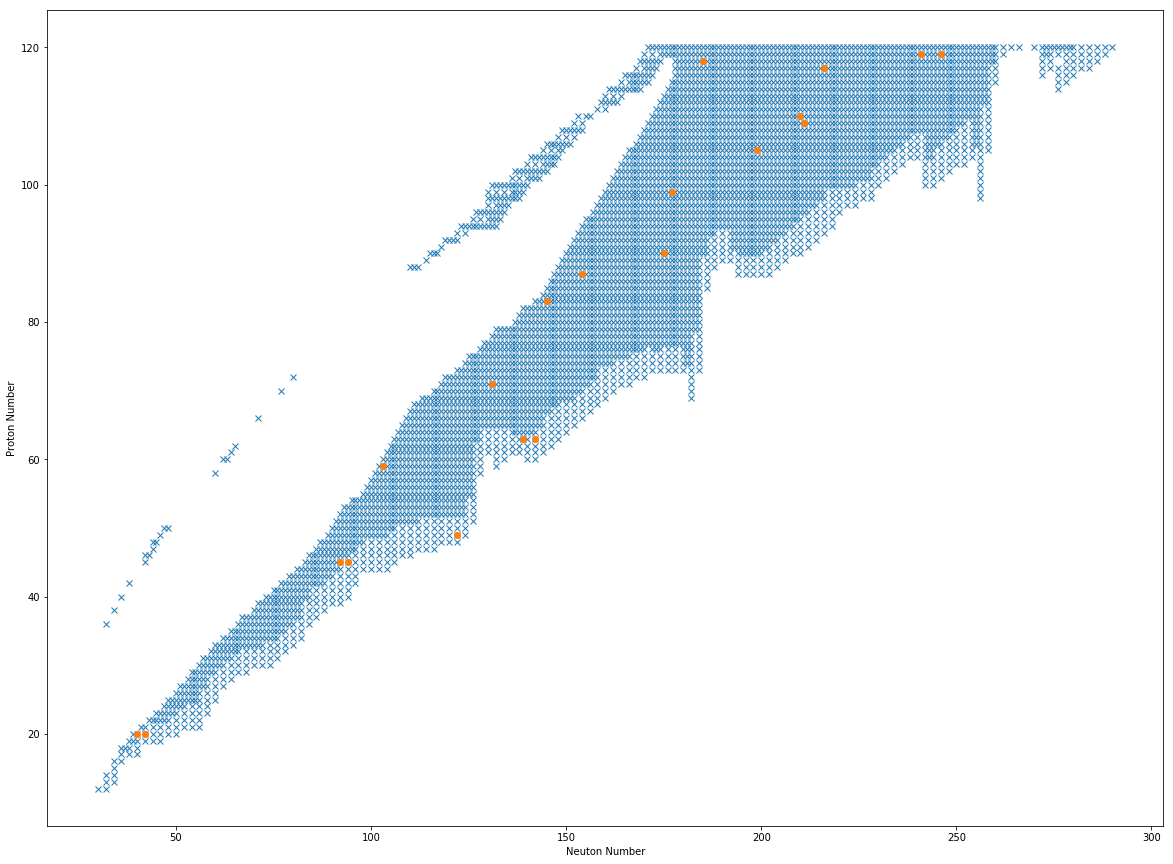

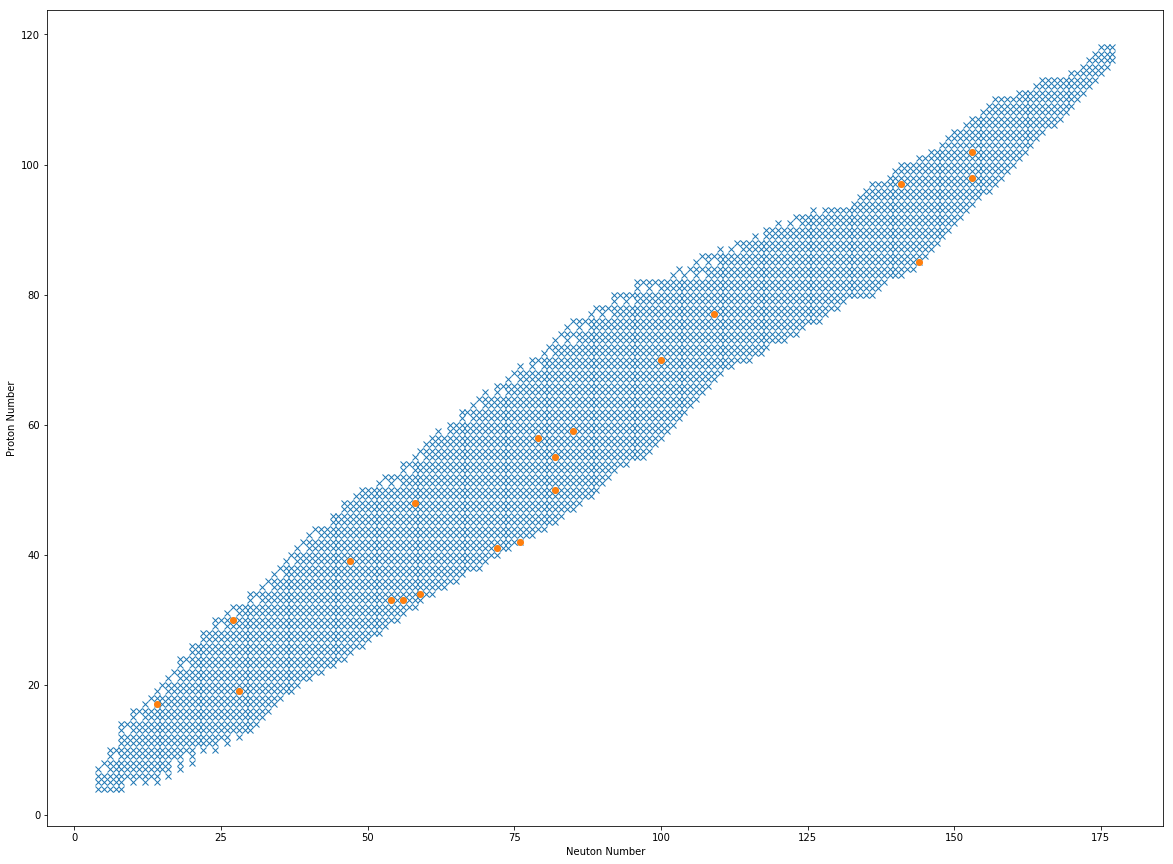

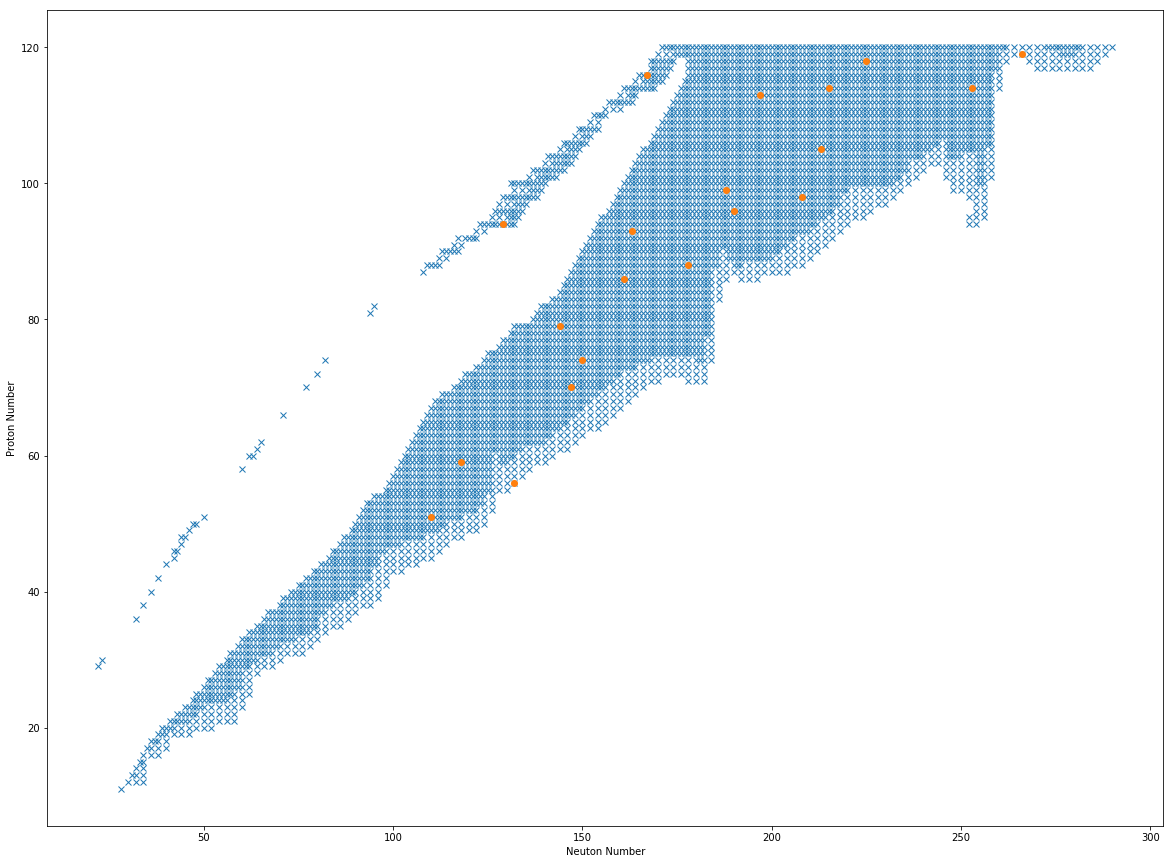

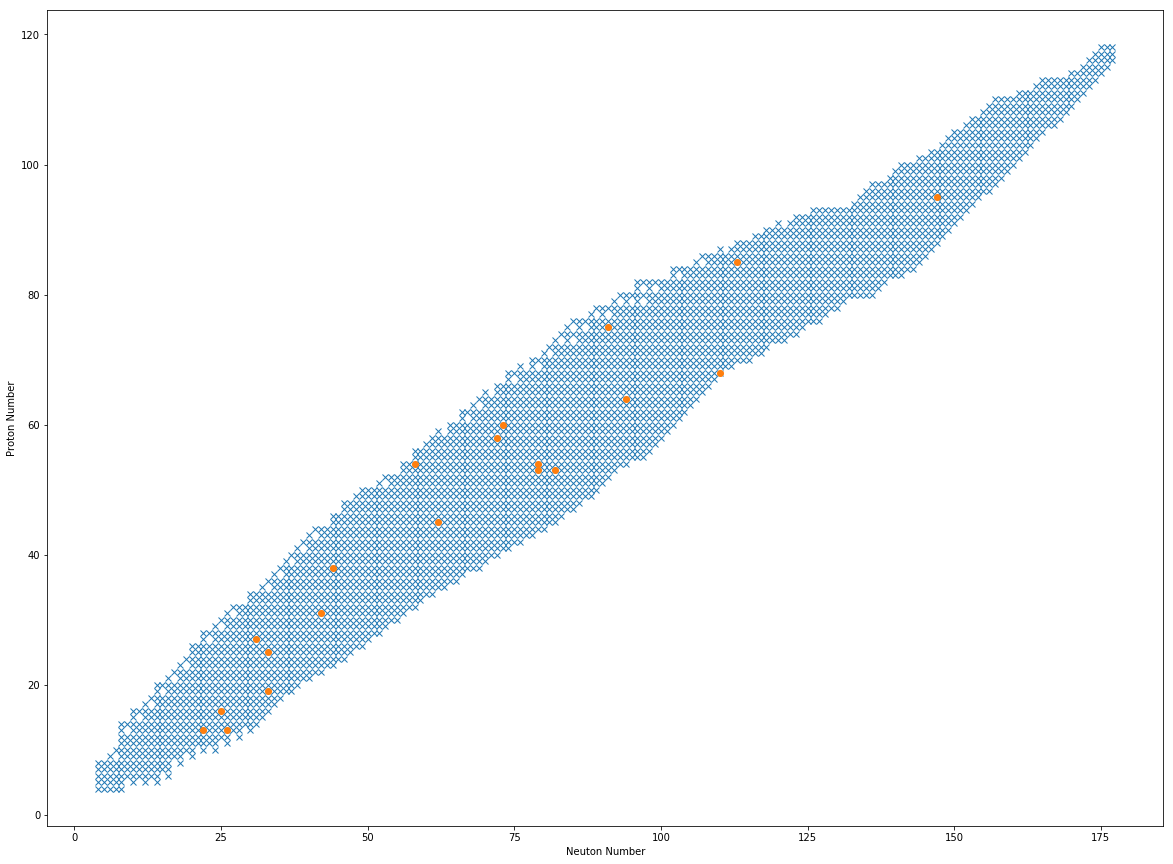

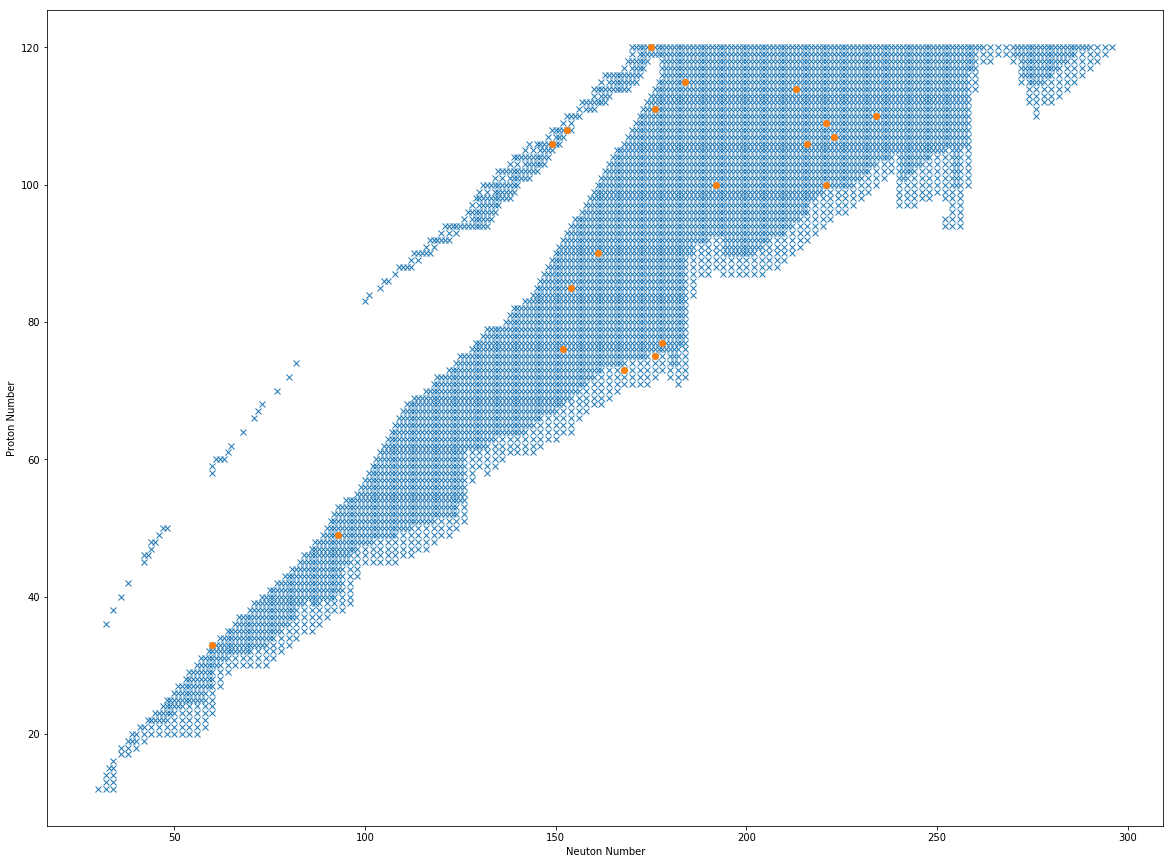

In [131]:
#out_refs MAKE OUT_REFS 
#in_refs  MAKE IN_REFS

out_refs  =[[],[],[],[],[],[]]
in_refs   =[[],[],[],[],[],[]]

for i in range(0,6):
    
    for j in range(0,20):
        in_refs[i].append(random.choice(the_exp_mat_energies[i]))
        out_refs[i].append(random.choice(the_no_mat_energies[i]))


for i in range(0,6):    
    plt.plot(np.transpose(the_exp_mat_energies[i])[0],np.transpose(the_exp_mat_energies[i])[1],"x")
    plt.plot(np.transpose(in_refs[i])[0],np.transpose(in_refs[i])[1],"o")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.show()
    
    plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1],"x")
    plt.plot(np.transpose(out_refs[i])[0],np.transpose(out_refs[i])[1],"o")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.show()
    
    
    

# Finding the Distances between every nuclei and the reference nuclei

In [133]:
all_in_dist         =[[],[],[],[],[],[]]
all_out_dist        =[[],[],[],[],[],[]]


exp_mat_in_dist     =[[],[],[],[],[],[]]
exp_mat_out_dist    =[[],[],[],[],[],[]]

no_mat_in_dist      =[[],[],[],[],[],[]]
no_mat_out_dist     =[[],[],[],[],[],[]]

for i in range(0,6):
    for j in the_no_mat_energies[i]:
        #print(j[0])
        #print(j[1])
        
        d=[]
        for k in in_refs[i]:
            vert=k[0]-j[0]
            hori=k[1]-j[1]
            #For Q: 5,3
            d.append(np.sqrt(vert**2+hori**2))
        
        no_mat_in_dist[i].append(d)
            
            
        
        d=[]    
        for k in out_refs[i]:
            vert=k[0]-j[0]
            hori=k[1]-j[1] 
            #For Q: 3,3
            d.append(np.sqrt(vert**2+hori**2))
        
        no_mat_out_dist[i].append(d)
      

    
for i in range(0,6):
    for j in the_exp_mat_energies[i]:
        #print(j[0])
        #print(j[1])
        
        d=[]
        for k in in_refs[i]:
            vert=k[0]-j[0]
            hori=k[1]-j[1] 
            #For Q: 5,5
            d.append(np.sqrt(vert**2+hori**2))
        
        exp_mat_in_dist[i].append(d)
            
            
        
        d=[]    
        for k in out_refs[i]:
            vert=k[0]-j[0]
            hori=k[1]-j[1] 
            #For Q: 3,5
            d.append(np.sqrt(vert**2+hori**2))
        
        exp_mat_out_dist[i].append(d)



for i in range(0,6):
    for j in the_energies[i]:
        #print(j[0])
        #print(j[1])
        
        d=[]
        for k in in_refs[i]:
            vert=k[0]-j[0]
            hori=k[1]-j[1]
            #For Q: 5, 3 
            d.append(np.sqrt(vert**2+hori**2))
        
        all_in_dist[i].append(d)
            
            
        
        d=[]    
        for k in out_refs[i]:
            vert=k[0]-j[0]
            hori=k[1]-j[1] 
            #For Q: 3, 3
            d.append(np.sqrt(vert**2+hori**2))
        
        all_out_dist[i].append(d)
        


# Making lists of distances

In [134]:
 
all_distances  =[[],[],[],[],[],[]]
out_distances  =[[],[],[],[],[],[]]
in_distances   =[[],[],[],[],[],[]]

for i in range(0,6):
    for j in range(0,len(the_energies[i])):
        a=all_in_dist[i][j]+all_out_dist[i][j]
        all_distances[i].append(np.array(a))
        
    for j in range(0,len(the_no_mat_energies[i])):
        a=no_mat_in_dist[i][j]+no_mat_out_dist[i][j]
        out_distances[i].append(np.array(a))
        
    
    for j in range(0,len(the_exp_mat_energies[i])):
        a=exp_mat_in_dist[i][j]+exp_mat_out_dist[i][j]
        in_distances[i].append(np.array(a))
     
    


# Array Display 

In [143]:
for i in range(0,6):
    k=1
    print(name[i])
    for j in in_refs[i]:
        print(k, " in_refs:  ", j[0],j[1])
        k=k+1
        
    k=1
    for j in out_refs[i]:
        print(k, " out_refs:  ", j[0],j[1])
        k=k+1
    

print("===============================================================================")
print("                        0 ||1,||      ||  2   ||            ||   ||     ||")
print("exp_energies:           N,||Z,||      || E_BE,||            ||   ||     ||")
print("===============================================================================")
print("                        0 ||1,||  2   ||      ||            || 3 ||   4 || 5")
print("the_energies:           N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p")
print("===============================================================================")
print("                        0 ||1,||  2   ||      ||            || 3 ||  4  || 5")
print("the_no_mat_energies:    N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p")
print("===============================================================================")
print("                        0 ||1,||  2   ||  3   ||     4      || 5 ||   6 || 7")
print("the_exp_mat_energies:   N,||Z,|| T_BE,|| E_BE,|| difference,|| Q,|| S_n,|| S_p")
print("===============================================================================\n\n\n\n")
 
for i in range(0,6):
    print(name[i])
    
    print("experimental:                  ", np.shape(exp_energies))
    print("Theoretical:                   ", np.shape(the_energies[i]))
    print("All distances:                 ", np.shape(all_distances[i]))    

    print("Theoretical that don't match:  ",  np.shape(the_no_mat_energies[i]))
    print("Out Distances:                 ", np.shape(out_distances[i]))    
    
    
    print("Theoretical that match:        ",  np.shape(the_exp_mat_energies[i]))
    print("In Distances:                  ", np.shape(in_distances[i]), "\n\n\n")    
    
    
    print(exp_energies[i], '\n')
    print(the_energies[i][0], '\n')
    print(all_distances[i][0], '\n')
    print(the_no_mat_energies[i][0], '\n')
    print(out_distances[i][0], '\n')
    print(the_exp_mat_energies[i][0], '\n')
    print(in_distances[i][0], '\n')
    
    
    


SKMS
1  in_refs:   142.0 87.0
2  in_refs:   75.0 47.0
3  in_refs:   10.0 14.0
4  in_refs:   135.0 82.0
5  in_refs:   160.0 104.0
6  in_refs:   75.0 46.0
7  in_refs:   78.0 51.0
8  in_refs:   152.0 98.0
9  in_refs:   27.0 23.0
10  in_refs:   106.0 67.0
11  in_refs:   46.0 30.0
12  in_refs:   51.0 49.0
13  in_refs:   94.0 73.0
14  in_refs:   133.0 81.0
15  in_refs:   30.0 27.0
16  in_refs:   76.0 59.0
17  in_refs:   125.0 80.0
18  in_refs:   87.0 64.0
19  in_refs:   68.0 60.0
20  in_refs:   47.0 38.0
1  out_refs:   206.0 119.0
2  out_refs:   160.0 85.0
3  out_refs:   180.0 91.0
4  out_refs:   88.0 47.0
5  out_refs:   215.0 102.0
6  out_refs:   168.0 77.0
7  out_refs:   195.0 111.0
8  out_refs:   157.0 85.0
9  out_refs:   122.0 56.0
10  out_refs:   121.0 62.0
11  out_refs:   146.0 60.0
12  out_refs:   121.0 51.0
13  out_refs:   93.0 44.0
14  out_refs:   151.0 88.0
15  out_refs:   216.0 95.0
16  out_refs:   160.0 88.0
17  out_refs:   104.0 57.0
18  out_refs:   47.0 24.0
19  out_refs:   204

Out Distances:                  (4188, 40)
Theoretical that match:         (3277, 8)
In Distances:                   (3277, 40) 



[2.       1.       8.481781] 

[ 4.        4.       56.070979  2.212739 15.550024 14.131022] 

[110.80162454  66.84309987  10.44030651  80.9197133   92.80086206
 102.90286682  59.54829972  81.88406438 104.80935073  32.75667871
  30.47950131 173.41568557  13.60147051  48.25971405  62.12889827
  34.88552709  95.60334722  60.74537019  68.8839604  160.31219542
  90.35485598 155.64061167 124.39051411 143.55835051 204.94877409
 192.41881405 243.40295808 163.71927193 191.02355876 158.77657258
 186.49664876 216.78099548 121.80311983  43.46262762 163.44418007
 173.08090594 259.39352343 103.83159442 212.43822632 168.81350657] 

[ 30.        12.       270.718649 -24.056478   1.898529  28.524722] 

[ 85.63293759  42.80186912  16.76305461  56.85068161  67.88225099
  77.3369252   36.35931793  55.47071299  78.49203781   9.21954446
  12.36931688 147.29901561  18.24828759 

In [144]:
all_features         =[[],[],[],[],[],[]]
train_test_features  =[[],[],[],[],[],[]]
out_features         =[[],[],[],[],[],[]]



for i in range(0,6):
    train_test_features[i].append(np.transpose(the_exp_mat_energies[i])[0])
    train_test_features[i].append(np.transpose(the_exp_mat_energies[i])[5])
    
    #for j in range(8,48):
    #    train_test_features[i].append(np.transpose(the_exp_mat_energies[i])[j])
        
    #in_distances[i]
    for j in np.transpose(in_distances[i]):
        train_test_features[i].append(j)
        
        
    train_test_features[i]=np.transpose(train_test_features[i])
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    out_features[i].append(np.transpose(the_no_mat_energies[i])[0])
    out_features[i].append(np.transpose(the_no_mat_energies[i])[3])
    
    #for j in range(6,46):
    #    out_features[i].append(np.transpose(the_no_mat_energies[i])[j])
    for j in np.transpose(out_distances[i]):
        out_features[i].append(j)
        
    
    out_features[i]=np.transpose(out_features[i])
    
    
    
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    all_features[i].append(np.transpose(the_energies[i])[0])
    all_features[i].append(np.transpose(the_energies[i])[3])
    #for j in range(6,46):
    #    all_features[i].append(np.transpose(the_energies[i])[j])
    for j in np.transpose(all_distances[i]):
        all_features[i].append(j)
        
    
    
    all_features[i]=np.transpose(all_features[i])
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
    
    
    print(name[i])
    print(len(out_features[i])+len(train_test_features[i]))
    print(np.shape(all_features[i]))
    print(np.shape(out_features[i]))
    print(np.shape(train_test_features[i]),"\n")
    

SKMS
8687
(8687, 42)
(5430, 42)
(3257, 42) 

SKP
7465
(7465, 42)
(4188, 42)
(3277, 42) 

SLY4
7252
(7252, 42)
(3986, 42)
(3266, 42) 

SV-MIN
7911
(7911, 42)
(4632, 42)
(3279, 42) 

UNEDF0
8287
(8287, 42)
(5010, 42)
(3277, 42) 

UNEDF1
8311
(8311, 42)
(5024, 42)
(3287, 42) 



In [145]:
#find overlap of oberservables for new files 
#use integral 

train_test_target  =[[],[],[],[],[],[]]


out_NZ             =[[],[],[],[],[],[]]
out_NZ_d           =[{},{},{},{},{},{},]
train_test_NZ      =[[],[],[],[],[],[]]
train_test_NZ_d    =[{},{},{},{},{},{},]



out_target         =[[],[],[],[],[],[]]


pred_in            =[[],[],[],[],[],[]]
pred_out           =[[],[],[],[],[],[]]
pred_all           =[[],[],[],[],[],[]]

pred_in_d          =[{},{},{},{},{},{}]
pred_out_d         =[{},{},{},{},{},{}]

rf_object=[[],[],[],[],[],[]]

for i in range(0,6):
    train_test_NZ[i]        =np.stack((np.transpose(the_exp_mat_energies[i])[0],np.transpose(the_exp_mat_energies[i])[1]))
    train_test_NZ[i]        =np.transpose(train_test_NZ[i])
    
    
    
    train_test_target[i]    =np.transpose(the_exp_mat_energies[i])[4]
        
    out_NZ[i]               =np.stack((np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1]))
    out_NZ[i]               =np.transpose(out_NZ[i])
    print(np.shape(train_test_target[i]))
    
    


for i in range(0,6):
    rf_object[i]=RandomForestRegressor(n_estimators=1000)#, bootstrap=False,)
    X_train, X_test, y_train, y_test = train_test_split(train_test_features[i], train_test_target[i], test_size =0.25, random_state=42 )
    rf_object[i].fit(X_train,y_train)
    
    print("train score:  ", rf_object[i].score(X_train,y_train))
    print("test score:   ", rf_object[i].score(X_test,y_test))
    
    
    pred_tr      =rf_object[i].predict(X_train)
    pred_te      =rf_object[i].predict(X_test)
    pred_in[i]   =rf_object[i].predict(train_test_features[i])
    pred_out[i]  =rf_object[i].predict(out_features[i])
    pred_all[i]  =rf_object[i].predict(all_features[i])
    
    print("mse: ", np.sqrt(mean_squared_error(pred_in[i], train_test_target[i])), "\n")
    

for i in range(0,6):
    for j in range(0,len(train_test_NZ[i])):
        pred_in_d[i][train_test_NZ[i][j][0],train_test_NZ[i][j][1]]= pred_in[i][j]
        
    for j in range(0,len(out_NZ[i])):
        pred_out_d[i][out_NZ[i][j][0],out_NZ[i][j][1]]=pred_out[i][j]


(3257,)
(3277,)
(3266,)
(3279,)
(3277,)
(3287,)
train score:   0.998127483212159
test score:    0.9839083610757204
mse:  0.49304197950516965 

train score:   0.9962549831934231
test score:    0.9714837393197692
mse:  0.34326035514420555 

train score:   0.9972624237206059
test score:    0.9731620812015912
mse:  0.41419805362172707 

train score:   0.9916620665696358
test score:    0.9351300346749036
mse:  0.32406125714643136 

train score:   0.9815215540457166
test score:    0.853788363327197
mse:  0.34471851055869224 

train score:   0.993699599586669
test score:    0.947273857995953
mse:  0.3062204862465215 



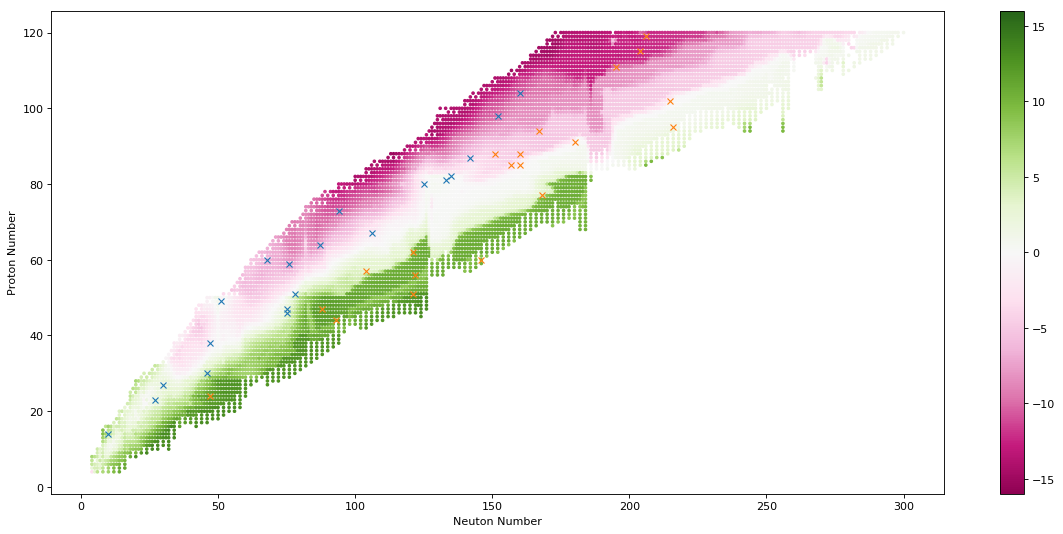

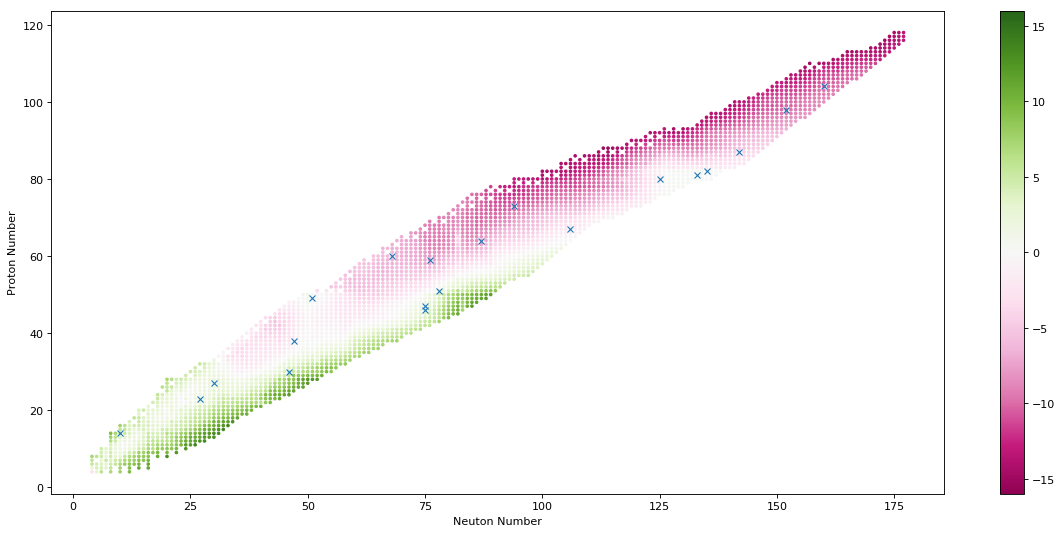

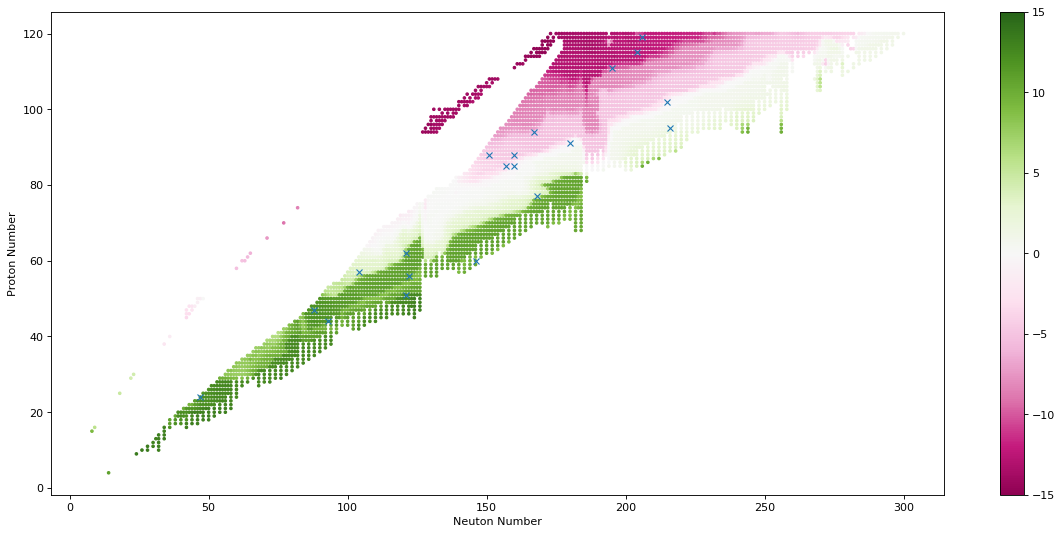

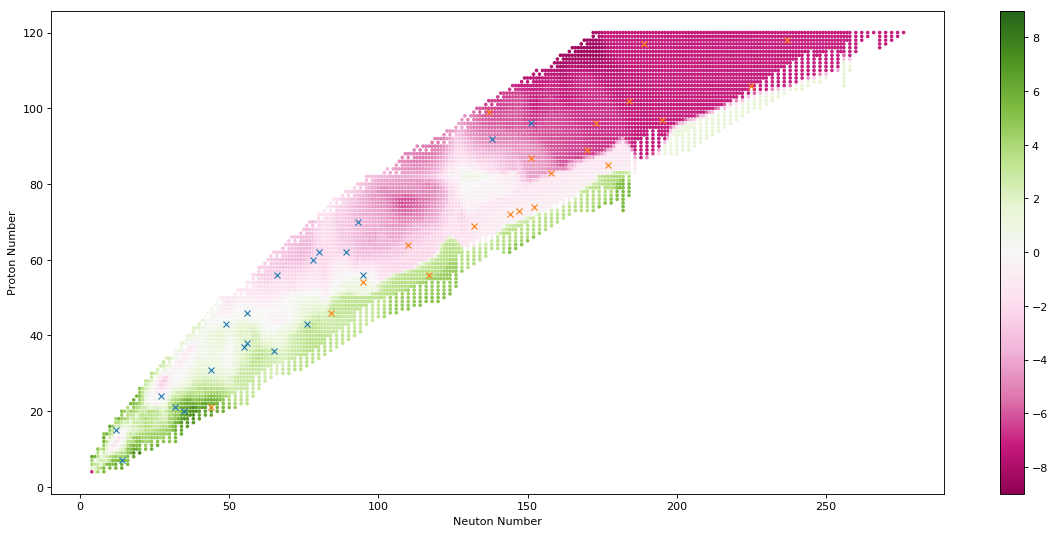

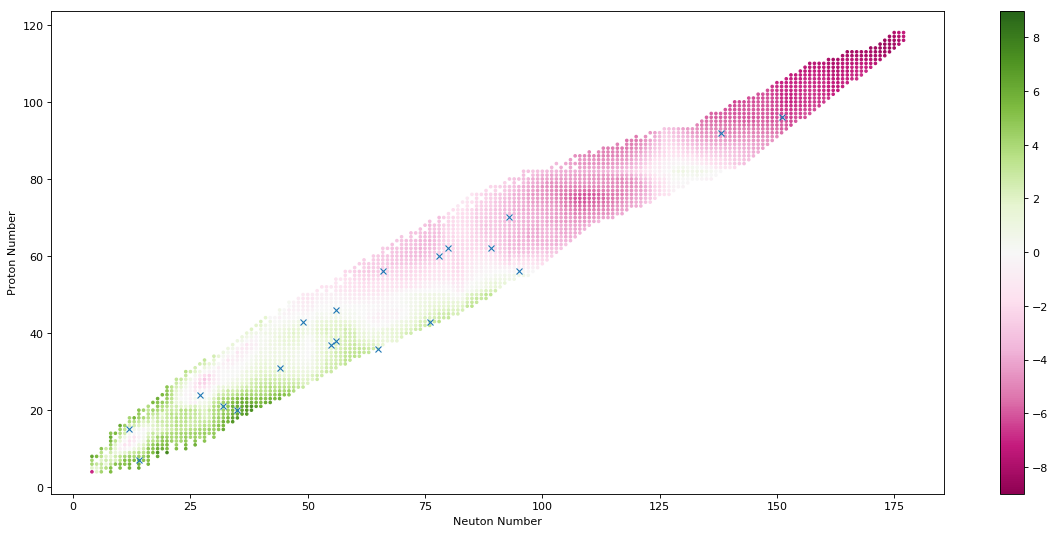

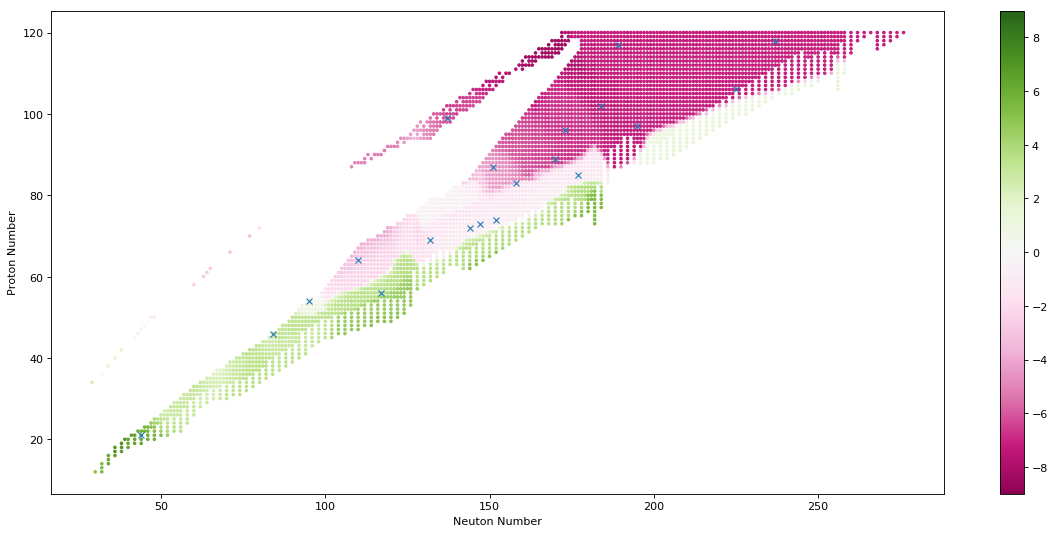

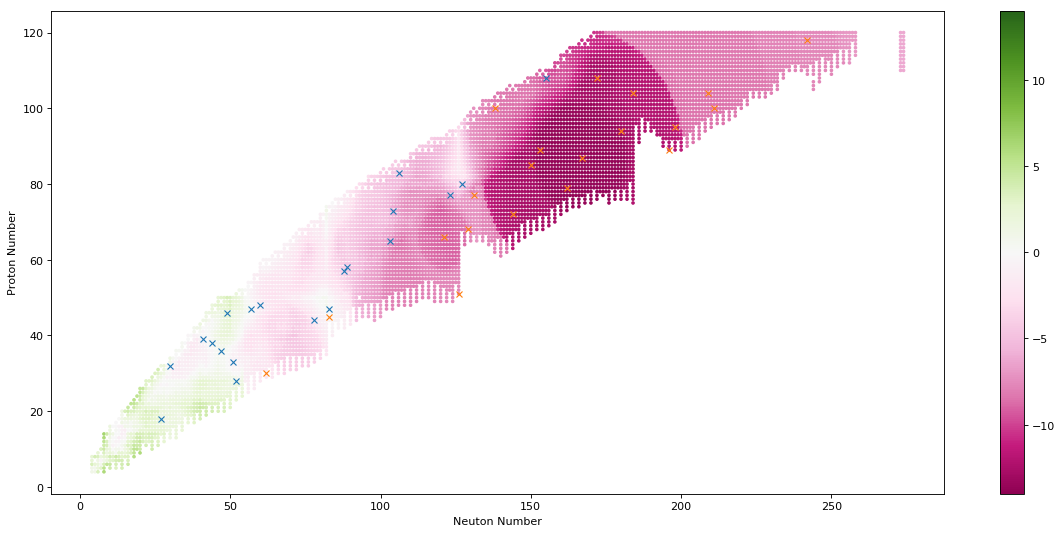

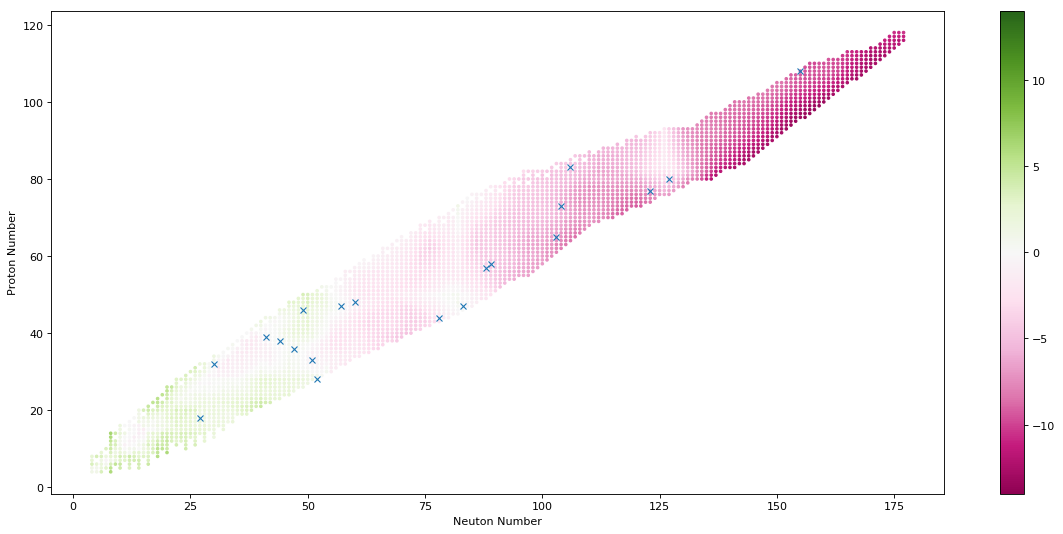

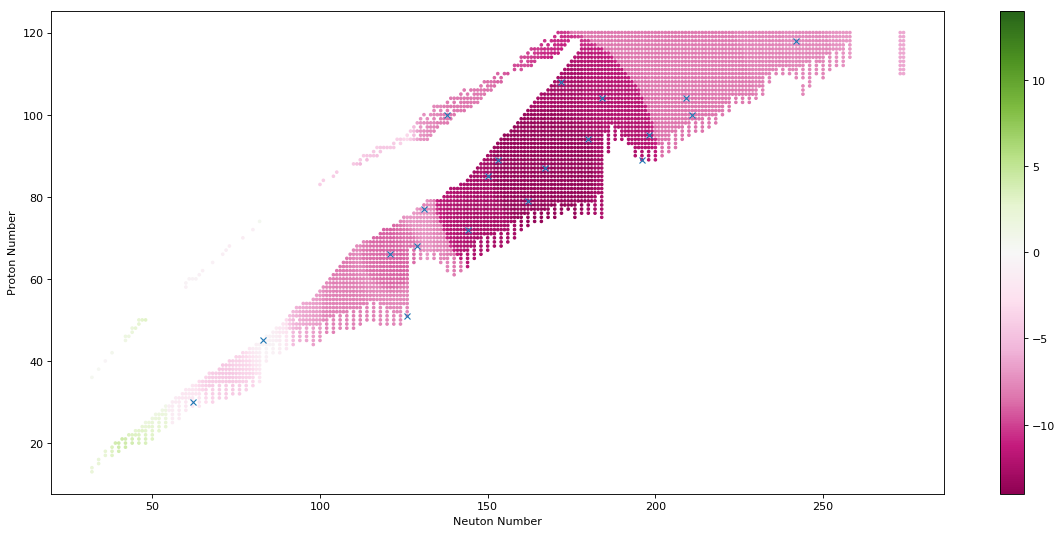

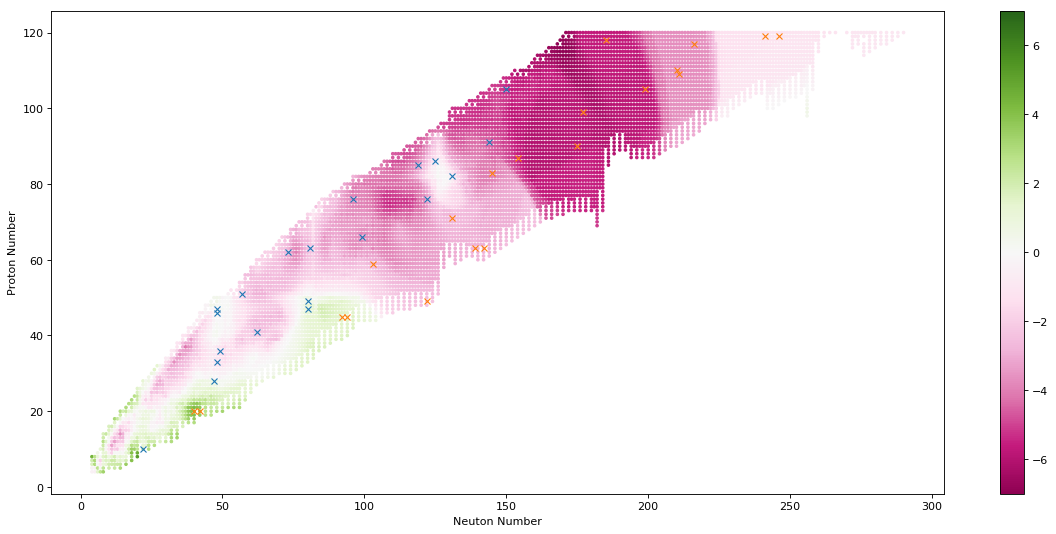

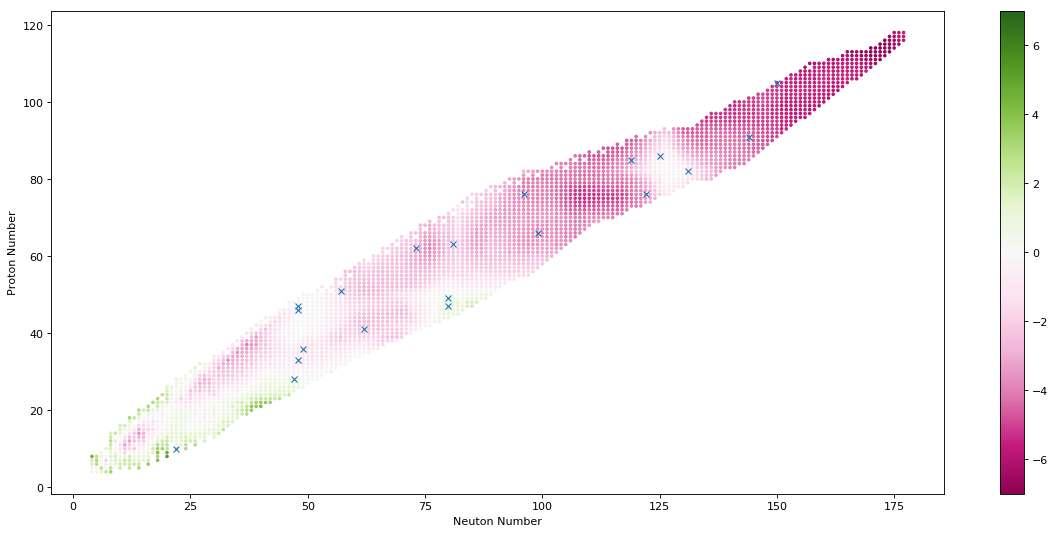

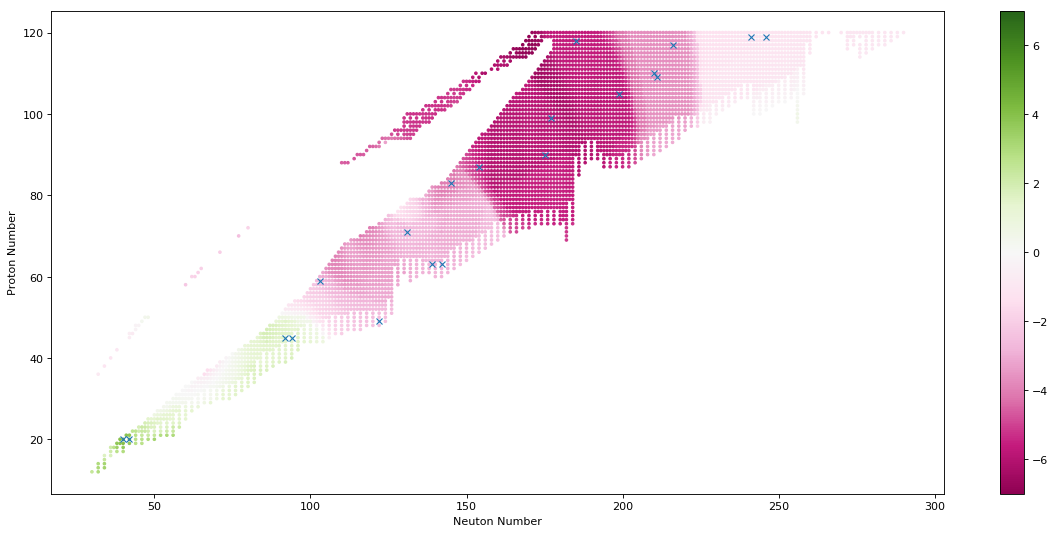

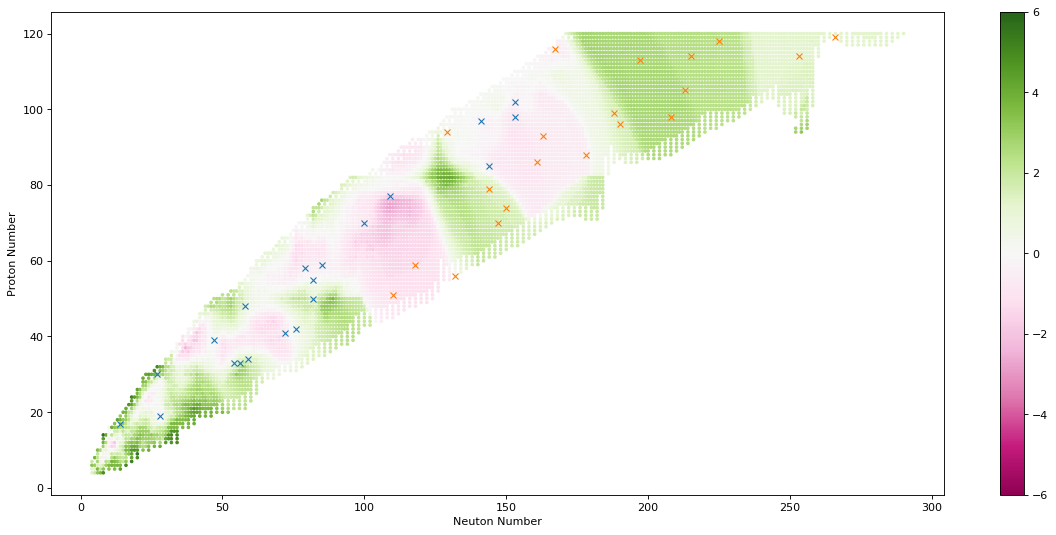

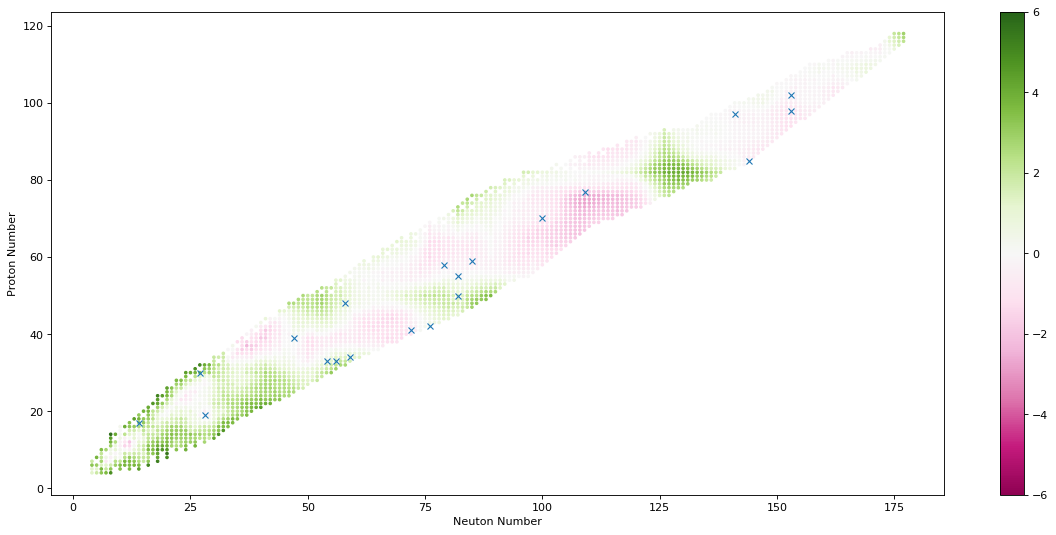

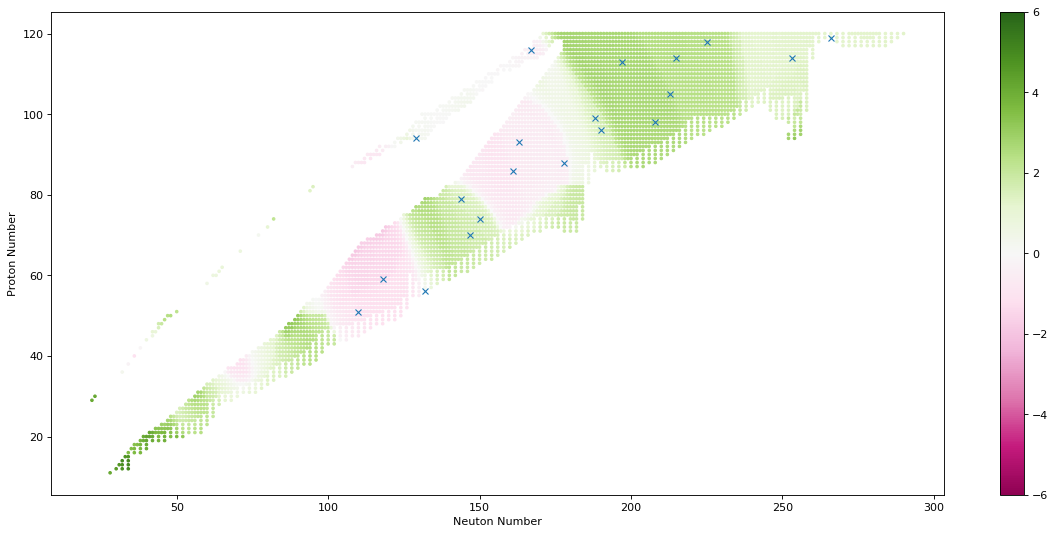

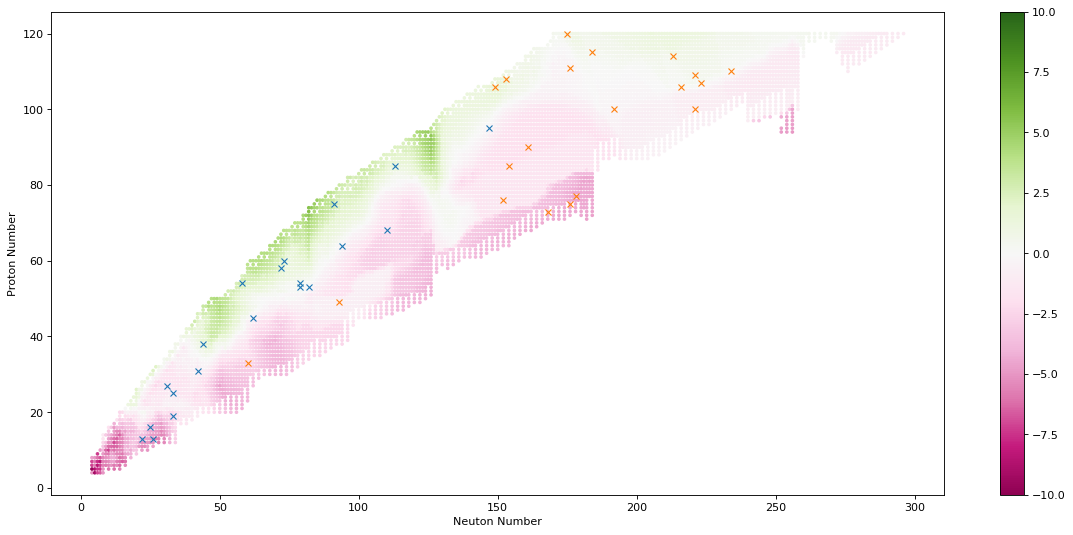

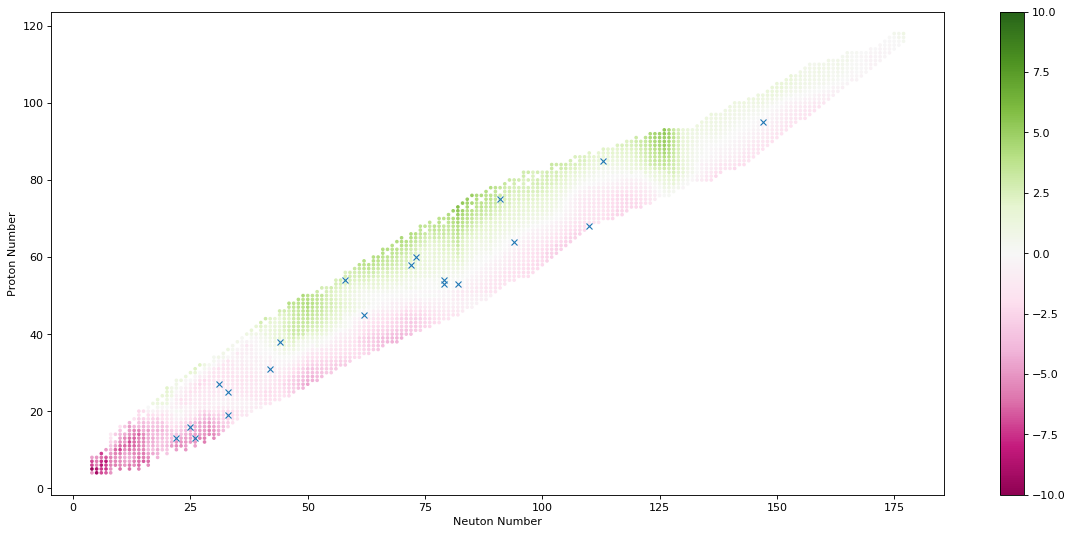

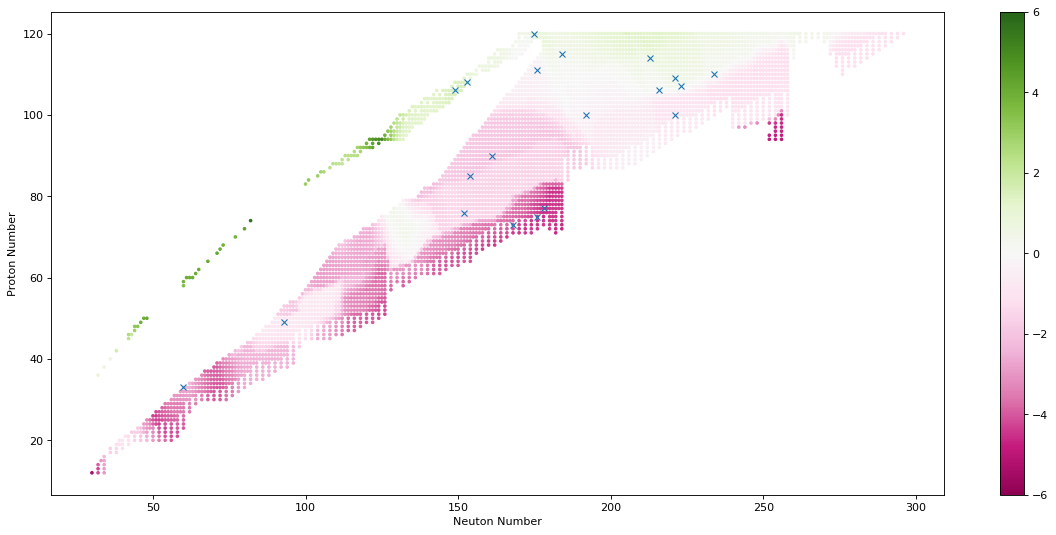

In [146]:
for i in range(0,6):
    ext = np.int(np.ceil(max(-np.min(pred_all[i]),np.max(pred_all[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(the_energies[i])[0],np.transpose(the_energies[i])[1],c=(pred_all[i]),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.plot(np.transpose(in_refs[i])[0],np.transpose(in_refs[i])[1],"x")
    plt.plot(np.transpose(out_refs[i])[0],np.transpose(out_refs[i])[1],"x")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.colorbar(sc)
    #plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1], "x")
    plt.show()
    
    ext = np.int(np.ceil(max(-np.min(pred_in[i]),np.max(pred_in[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(train_test_NZ[i])[0],np.transpose(train_test_NZ[i])[1],c=(pred_in[i]),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.plot(np.transpose(in_refs[i])[0],np.transpose(in_refs[i])[1],"x")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.colorbar(sc)
    #plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1], "x")
    plt.show()
    
    ext = np.int(np.ceil(max(-np.min(pred_out[i]),np.max(pred_out[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(out_NZ[i])[0],np.transpose(out_NZ[i])[1],c=(pred_out[i]),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.plot(np.transpose(out_refs[i])[0],np.transpose(out_refs[i])[1],"x")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.colorbar(sc)
    #plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1], "x")
    plt.show()
    

train score:   0.9934235276392759
test score:    0.9547054145392917
mse:  0.2916675911648652 



25 |||| 88.0 |||| 47.0 |||| 1.384677856791037
32 |||| 146.0 |||| 60.0 |||| 2.6976460081772853
34 |||| 93.0 |||| 44.0 |||| 1.6123909548678417




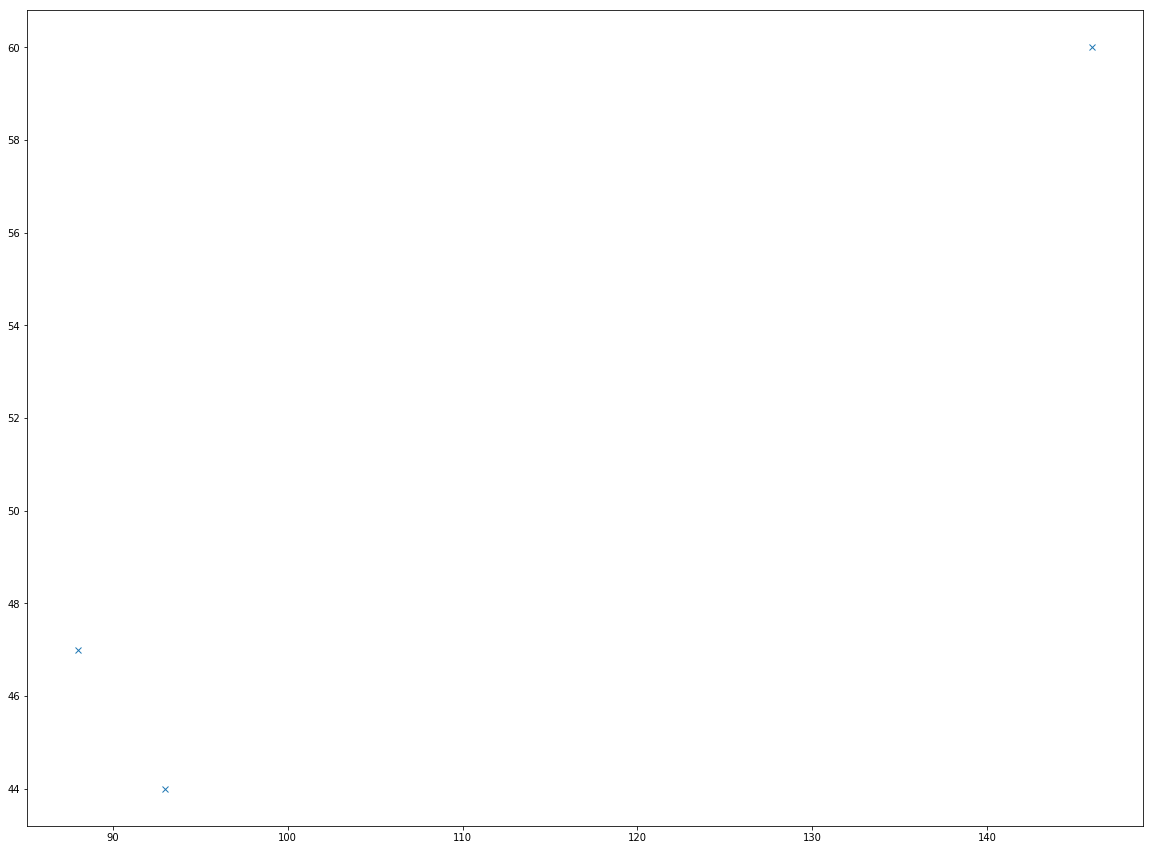









22 |||| 84.0 |||| 46.0 |||| 9.887481931106098
25 |||| 132.0 |||| 69.0 |||| 1.7129430286213374
34 |||| 110.0 |||| 64.0 |||| 3.2215030761190353
36 |||| 137.0 |||| 99.0 |||| 1.8506377747113925
39 |||| 95.0 |||| 54.0 |||| 1.5194061699069896




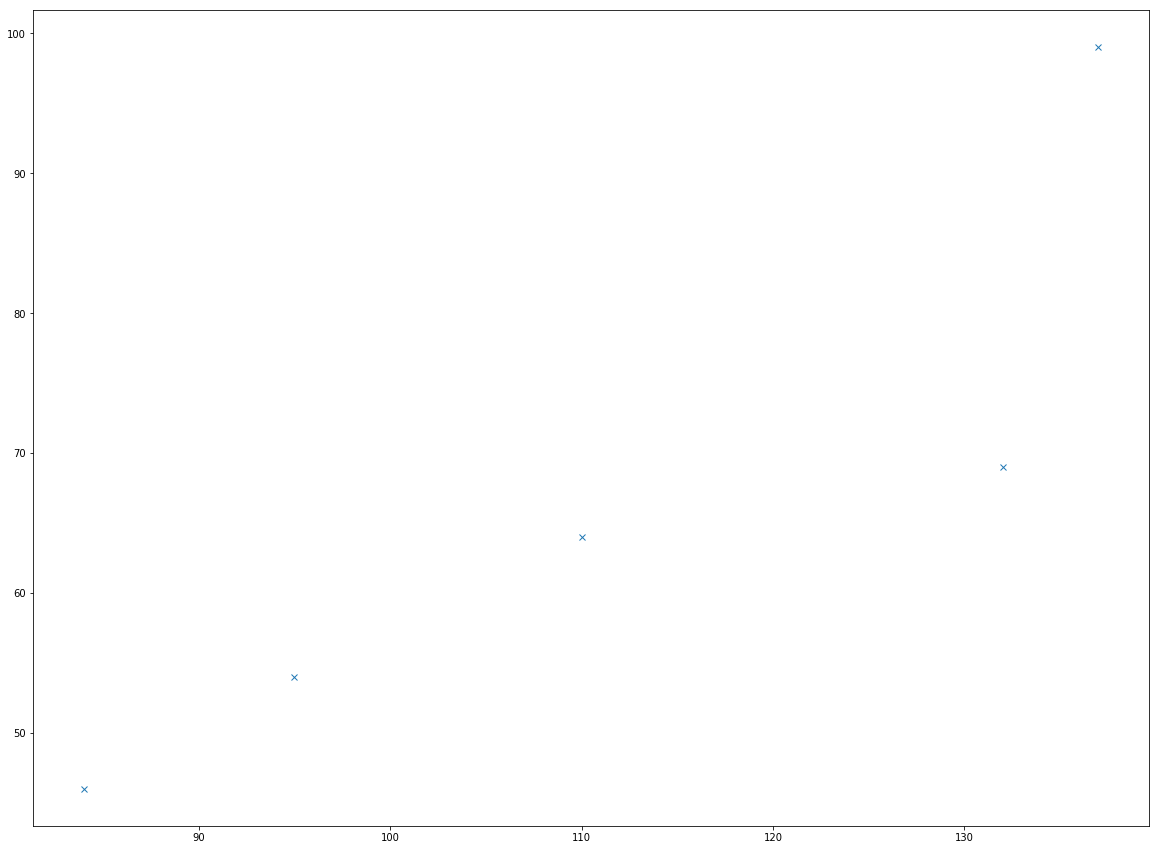









27 |||| 126.0 |||| 51.0 |||| 2.0168056060534827
30 |||| 167.0 |||| 87.0 |||| 9.47422119924774
31 |||| 196.0 |||| 89.0 |||| 1.5646280940016264




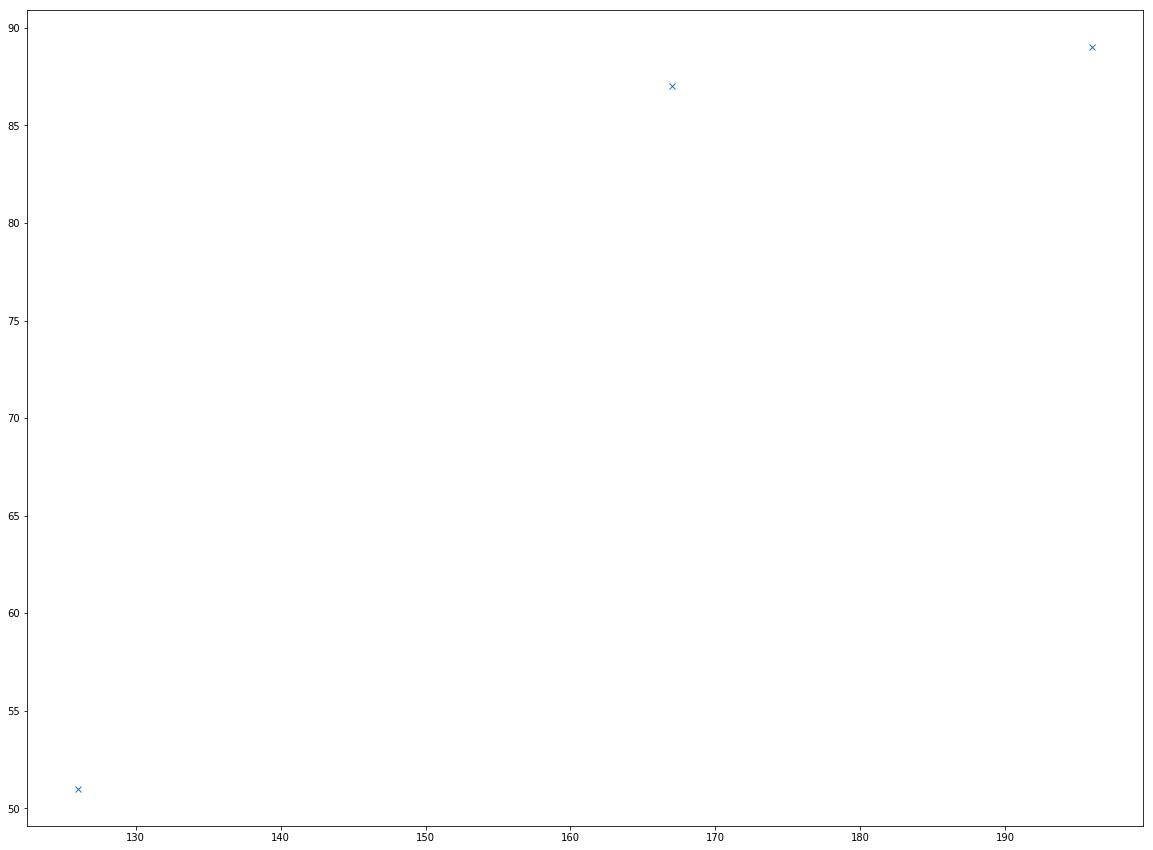







5 |||| 144.0 |||| 91.0 |||| 14.853533052642836
7 |||| 150.0 |||| 105.0 |||| 24.219440615361123
8 |||| 125.0 |||| 86.0 |||| 1.5589148117694578
9 |||| 131.0 |||| 82.0 |||| 3.2920907771789145
10 |||| 48.0 |||| 46.0 |||| 1.1900470244036423
11 |||| 80.0 |||| 47.0 |||| 1.098236165356171
12 |||| 22.0 |||| 10.0 |||| 1.97431524105936


23 |||| 122.0 |||| 49.0 |||| 8.09421626918245
24 |||| 42.0 |||| 20.0 |||| 3.0519085709247196
26 |||| 145.0 |||| 83.0 |||| 4.512867272534274
31 |||| 40.0 |||| 20.0 |||| 1.3770349448902317
38 |||| 185.0 |||| 118.0 |||| 1.2765892897726328




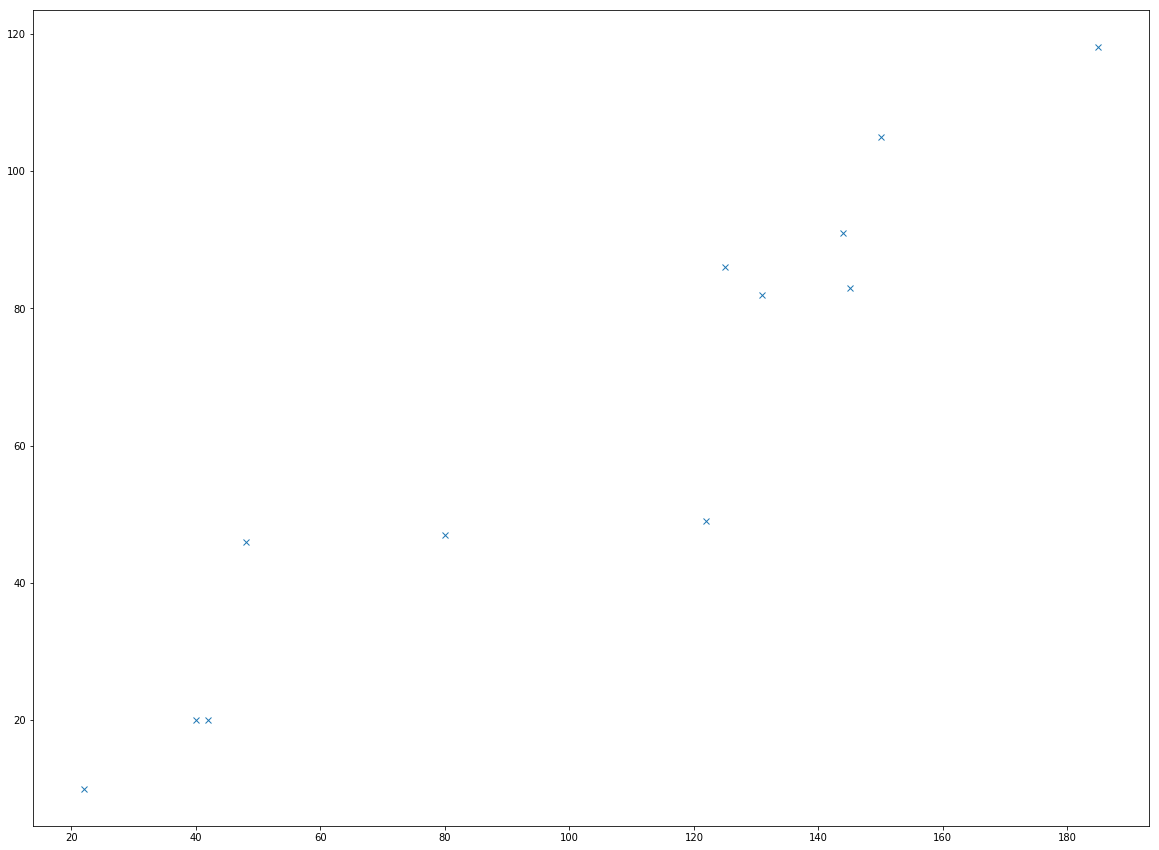







2 |||| 14.0 |||| 17.0 |||| 1.9566075503849307
4 |||| 82.0 |||| 50.0 |||| 3.0612687023384377
7 |||| 59.0 |||| 34.0 |||| 1.806418081318591
8 |||| 28.0 |||| 19.0 |||| 5.944633841467215
9 |||| 109.0 |||| 77.0 |||| 2.868625766128521
10 |||| 100.0 |||| 70.0 |||| 1.0245068074654387
13 |||| 47.0 |||| 39.0 |||| 2.4575846527089444
15 |||| 79.0 |||| 58.0 |||| 1.557610044367198
17 |||| 76.0 |||| 42.0 |||| 1.2550888440632206
18 |||| 58.0 |||| 48.0 |||| 1.7444810548211096
19 |||| 27.0 |||| 30.0 |||| 3.709742568456799
20 |||| 72.0 |||| 41.0 |||| 2.6326945705956297


23 |||| 161.0 |||| 86.0 |||| 1.0536286870278677
33 |||| 132.0 |||| 56.0 |||| 11.08551165253124
35 |||| 118.0 |||| 59.0 |||| 12.433565250559829
36 |||| 129.0 |||| 94.0 |||| 19.798782623338653
41 |||| 110.0 |||| 51.0 |||| 2.1294761168327465




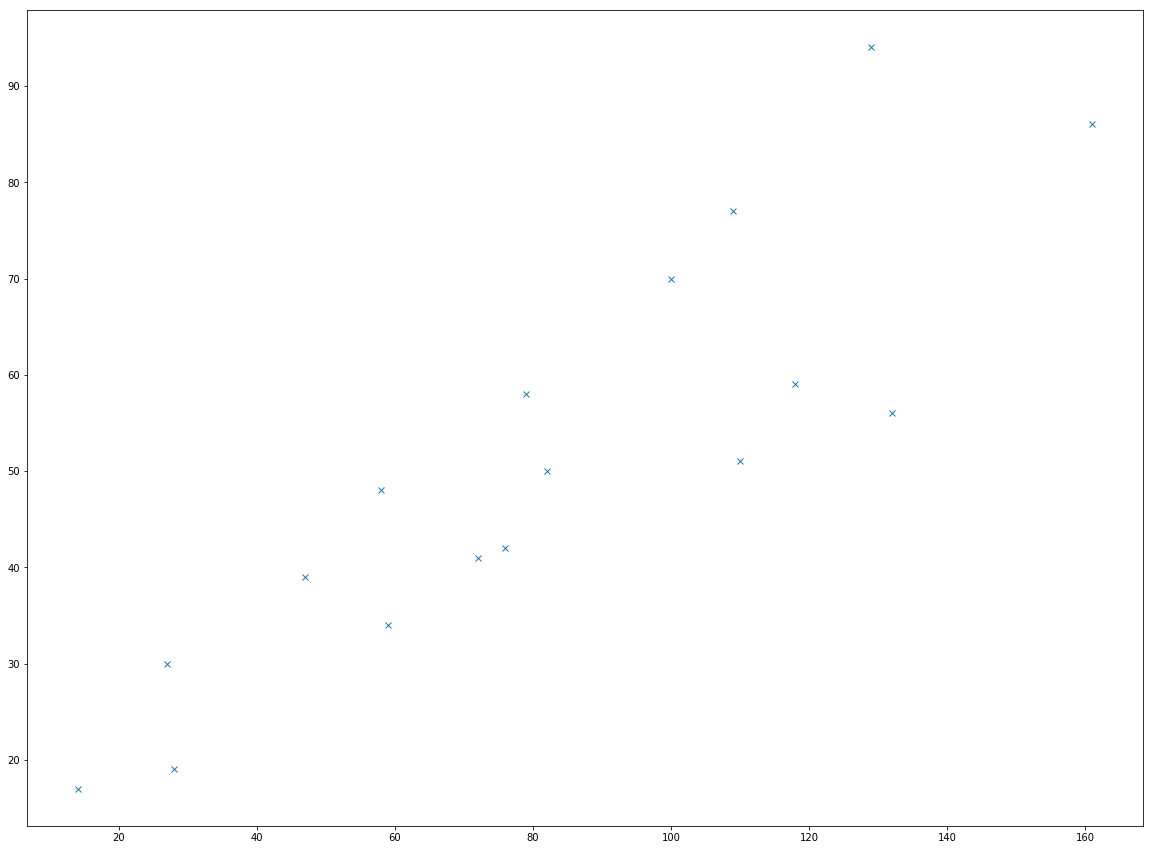







2 |||| 58.0 |||| 54.0 |||| 9.246431325942298
4 |||| 62.0 |||| 45.0 |||| 1.2952728995682001
5 |||| 44.0 |||| 38.0 |||| 1.006945215758573
7 |||| 110.0 |||| 68.0 |||| 7.423850851745343
14 |||| 26.0 |||| 13.0 |||| 1.5749483909062847
15 |||| 73.0 |||| 60.0 |||| 1.325979032294524
18 |||| 91.0 |||| 75.0 |||| 1.5627603313831344


23 |||| 60.0 |||| 33.0 |||| 1.8438398076805986
24 |||| 176.0 |||| 75.0 |||| 2.9417976130473895
27 |||| 93.0 |||| 49.0 |||| 7.216284886694944
34 |||| 178.0 |||| 77.0 |||| 1.2807914033090377
40 |||| 168.0 |||| 73.0 |||| 2.1929415181843313




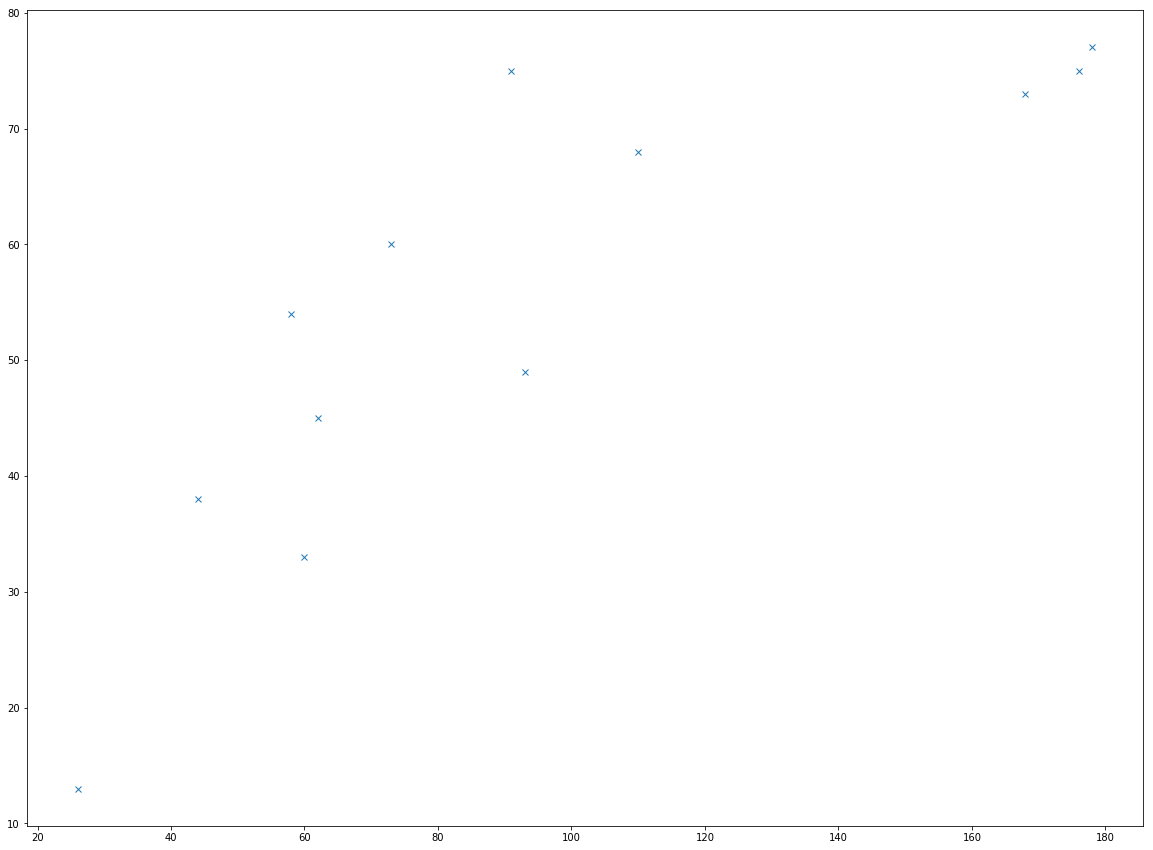

In [264]:
l=[[],[],[],[],[],[]]
for i in range(0,6):
    
    a=in_refs[i]+out_refs[i]
    
    k=[]
    """
    for j in range(0,len(a)):
        k.append((a[j][0],a[j][1]))
    
    #print(np.shape(k))
    print(rf_object[i].feature_importances_[2:]*100)
    ext = np.int(np.ceil(max(rf_object[i].feature_importances_[2:]*100)))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(k)[0],np.transpose(k)[1],c=(rf_object[i].feature_importances_[2:]*100),cmap='PiYG',vmax=ext,s=150)
    plt.plot(np.transpose(k[20:40])[0],np.transpose(k[20:40])[1],"x")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.colorbar(sc)
    #plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1], "x")
    plt.show()
    """
    
    for j in range(0,len(in_refs[i])):
        if rf_object[i].feature_importances_[j+2]*100>=1:
            l[i].append((in_refs[i][j][0],in_refs[i][j][1],rf_object[i].feature_importances_[j+2]*100 ))
            print(j+2, "||||", in_refs[i][j][0], "||||", in_refs[i][j][1], "||||", rf_object[i].feature_importances_[j+2]*100)
    
    print("\n")
    for j in range(0,len(out_refs[i])):
        if rf_object[i].feature_importances_[j+22]*100>=1:
            l[i].append((out_refs[i][j][0],out_refs[i][j][1],rf_object[i].feature_importances_[j+22]*100 ))
            print(j+22, "||||", out_refs[i][j][0], "||||", out_refs[i][j][1], "||||", rf_object[i].feature_importances_[j+22]*100)
    print("\n")
    
    plt.plot(np.transpose(l[i])[0],np.transpose(l[i])[1], "x")
    plt.show()
    
    
    print("\n\n\n\n\n")
    
    # 1: 1, 25, 32, 34
    # 2: 1, 22, 25, 34, 36, 39
    # 3: 0, 1, 27,30, 31
    # 4: 0, 1, 5, 7, 8,9,10,11,12,23,24,26,31,38
    # 5: 0, 1, 2, 4, 7,8,9,10,13,15,17,18,19,20,23,33,35,36,41
    # 6: 0, 1, 2, 4, 5,7,14,15,18,23,24,27,34,40
         